### ✅ Checklist for Feature Evaluation

#### 📊 Statistical Properties
- [ ] Calculate **mean**, **median**, and **standard deviation** for numeric features (e.g., `Price`, `Volume`, `Final`)
- [ ] Assess **skewness** and apply transformations (e.g., `np.log1p` for positive skewed features like `Volume`)
- [ ] Identify and handle **outliers** using Z-score (e.g., clip at ±3 std) or winsorization (e.g., 5% limits)
- [ ] Remove **low-variance features** (e.g., `nunique() == 1`) or constant features
- [ ] Apply **standardization** (RobustScaler for TDA features) or **normalization** (Min-Max for specific features)
- [ ] Check **stationarity** using ADF test (p < 0.05); apply differencing if non-stationary
- [ ] Evaluate **kurtosis** to identify heavy/light tails (e.g., kurtosis > 3.5 for heavy tails)

#### 🔢 Numeric Features
- [ ] Apply **RobustScaler** for TDA features and **StandardScaler** for others to handle outliers
- [ ] Review **correlation matrix** (Pearson/Spearman) to identify multicollinearity (|corr| > 0.8)
- [ ] Remove or combine highly correlated features (e.g., VIF < 5 or |corr| < 0.8)
- [ ] Compute **non-linear relationships** using mutual information for features like `Final`, `RSI`
- [ ] Generate **lagged features** (e.g., `Final_Lag_1`, `Pct_Change_3`) for time-series dynamics
- [ ] Calculate **rolling statistics** (e.g., `Rolling_Mean_5`, `Rolling_Std_10`, `Z_Score_10`)

#### 🏷️ Categorical Features
- [ ] Confirm no categorical features in dataset; if present, apply **One-Hot Encoding** for nominal or **Label Encoding** for ordinal
- [ ] Check **cardinality** and group rare categories (e.g., < 5% frequency)
- [ ] Ensure consistent category mapping across train/test splits

#### 📈 Feature Importance
- [ ] Compute feature importance using **Random Forest**, **XGBoost**, or **CatBoost** (e.g., `model.feature_importances_`)
- [ ] Use **SHAP values** for interpretable feature contributions
- [ ] Perform statistical tests (e.g., **Chi-squared** for categorical, **ANOVA** for numeric) if applicable
- [ ] Select top N features (e.g., top 7 via `nlargest`) for TDA preprocessing
- [ ] Validate importance stability using **TimeSeriesSplit** cross-validation

#### 🔽 Dimensionality Reduction
- [ ] Apply **PCA** or **UMAP** for visualization of high-dimensional features (e.g., TDA outputs)
- [ ] Retain >90% variance in PCA; standardize features before reduction
- [ ] Use **t-SNE** for exploratory visualization of feature clusters
- [ ] Incorporate **TDA features** (e.g., Persistence Entropy, Betti Numbers) with tuned `window_size` and `max_edge_length`

### ✅ Checklist for Effective Engineered Features in Classification
- [ ] **Correlation with target**: Confirm feature relevance using mutual information, ANOVA, or feature importance (e.g., `Final_Lag_1`, `RSI`)
- [ ] **Class separation**: Validate using box plots, t-SNE, or class-wise histograms (e.g., `Momentum_10` for class 0 vs. 1)
- [ ] **Creative derivation**: Include innovative features like `Price_Range`, `Volatility_Break`, or TDA-based `Persistence_Entropy`
- [ ] **Multicollinearity-free**: Ensure low VIF (< 5) or correlation (< 0.8) for features like `MACD`, `Signal`
- [ ] **Stability**: Test feature consistency across train/test splits (e.g., `Rolling_Mean_5` stable across dates)
- [ ] **Scalability**: Apply RobustScaler or StandardScaler to features like `ATR`, `MFI` for model compatibility
- [ ] **Interpretability**: Ensure features like `OBV`, `SMA` are explainable for stakeholder reporting
- [ ] **Robustness to noise**: Verify features (e.g., `W_Price`, `CMF`) are not overly sensitive to small price/volume fluctuations
- [ ] **Temporal consistency**: Check lagged features (`Final_Lag_3`, `Vol_Change_1`) align with time-series structure
- [ ] **TDA-specific checks**:
  - [ ] Tune `window_size` (e.g., 20, 50) and `max_edge_length` (e.g., 0.5, 2.0) for TDA features
  - [ ] Ensure TDA features (`Betti_Number`, `Mean_Lifetime`) enhance AUC in cross-validation

In [ ]:
# Core Data Manipulation
import numpy as np                    # Numerical computations and array operations
import pandas as pd                   # Data manipulation and analysis with DataFrames
import pandas_datareader.data as web  # Fetching financial data from online sources
import jalali_pandas                  # Pandas extension for Jalali (Persian) calendar support
import jdatetime                      # Handling Jalali (Persian) dates

# Statistical Analysis
from scipy.stats import skew, kurtosis, mstats, zscore  # Statistical measures (skewness, kurtosis, winsorization, z-scores)
from statsmodels.tsa.stattools import acf, adfuller, coint  # Time series analysis (autocorrelation, stationarity, cointegration)
from statsmodels.graphics.tsaplots import plot_acf  # Plotting autocorrelation functions
import statsmodels.api as sm          # Statistical modeling and econometrics

# Machine Learning and Modeling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # Ensemble learning models
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV, train_test_split  # Model selection and splitting
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report  # Model evaluation metrics
from sklearn.feature_selection import SelectFromModel  # Feature selection based on model importance
from sklearn.preprocessing import StandardScaler, RobustScaler  # Data scaling and normalization
from sklearn.impute import KNNImputer, SimpleImputer  # Handling missing data
from sklearn.svm import SVC           # Support Vector Machine classifier
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron for neural networks
from sklearn.decomposition import KernelPCA  # Kernel Principal Component Analysis
from imblearn.over_sampling import SMOTE  # Synthetic Minority Oversampling Technique for imbalanced data
from xgboost import XGBClassifier     # Extreme Gradient Boosting classifier
from catboost import CatBoostClassifier  # Gradient boosting for categorical data
from lightgbm import LGBMClassifier   # Light Gradient Boosting Machine classifier
import joblib                        # Saving and loading machine learning models

# Deep Learning
from tensorflow.keras.models import Sequential  # Sequential model for neural networks
from tensorflow.keras.layers import LSTM, Dense, Dropout  # Layers for recurrent neural networks and regularization
from tensorflow.keras.optimizers import Adam  # Optimizer for neural network training

# Computational Topology
from ripser import ripser               # Rips complex for persistent homology
import persim                        # Persistent homology analysis and comparison

# Visualization
import matplotlib.pyplot as plt       # General-purpose plotting
import seaborn as sns                 # Statistical data visualization
import shap                           # Explainability for machine learning models
from tabulate import tabulate         # Formatting data as tables for display

# Utility Tools
from itertools import combinations    # Generating combinations of items
import os                             # Operating system interactions (e.g., file handling)
import json                           # JSON data handling
import uuid                           # Generating unique identifiers
import logging                        # Logging events for debugging
import warnings                       # Suppressing warning messages
import glob                           # File pattern matching
import requests                       # Making HTTP requests
from io import StringIO               # String-based I/O operations
from urllib.request import Request, urlopen  # URL handling for web requests
from datetime import datetime, date, timedelta  # Date and time manipulation
import arabic_reshaper                # Reshaping Arabic text for display
from bidi.algorithm import get_display  # Handling bidirectional text
from tqdm import tqdm                 # Progress bars for iterative tasks

# Suppress warnings
warnings.filterwarnings('ignore')     # Ignore warning messages during execution


Feching High Frequency Data

In [10]:
# name = 'اهرم'
# start_ = "1404-01-01"
# end_ = '1404-03-19'

# lp = '17914401175772326'
# url = f'https://old.tsetmc.com/Loader.aspx?ParTree=151311&i={lp}'


# def shamsi_to_gregorian(shamsi_date_str):
#     year, month, day = map(int, shamsi_date_str.split('-'))
#     gregorian_date = jdatetime.date(year, month, day).togregorian()
#     return gregorian_date.strftime('%Y%m%d')
# start = shamsi_to_gregorian(start_)
# end = shamsi_to_gregorian(end_)

# start_date = datetime.strptime(start, '%Y%m%d')
# end_date = datetime.strptime(end, '%Y%m%d')

# dates = []
# current_date = start_date
# while current_date <= end_date:
#     dates.append(current_date.strftime('%Y%m%d'))
#     current_date += timedelta(days=1)

# part = url.split('=')[2]

# dataframes = []

# def get_data(part, name, DEven):
#     url = f'http://cdn.tsetmc.com/api/Trade/GetTradeHistory/{part}/{DEven}/false'
#     print(f"Fetching data for {DEven}")
#     request_site = Request(url, headers={"User-Agent": "Mozilla/5.0"})
    
#     try:
#         webpage = urlopen(request_site).read()
#     except Exception as e:
#         print(f"Failed to fetch data for {DEven}: {e}")
#         return None

#     list_url = str(webpage).split(',')
#     list_of_time = []
#     list_of_volume = []
#     list_of_price = []

#     for item in list_url:
#         if '"hEven"' in item:
#             list_of_time.append(float(item[8:]))
#         elif '"qTitTran"' in item:
#             list_of_volume.append(float(item[11:]))
#         elif '"pTran"' in item:
#             list_of_price.append(float(item[8:]))

#     if not list_of_time:
#         return None 

#     list_of_price = [int(price) for price in list_of_price]

#     result_list = np.array([list_of_time, list_of_volume, list_of_price]).T
#     result = pd.DataFrame(result_list, columns=['Time', 'Volume', 'Price'])

#     result['Time'] = result['Time'].astype(str).str.replace('.', '')
#     result['Time'] = result['Time'].astype(int).astype(str).str[:-1]
#     result['Time'] = result['Time'].apply(lambda x: x if len(x) == 6 else '0' + x)
#     result['Time'] = pd.to_datetime(result['Time'], format='%H%M%S').dt.time
#     result.set_index('Time', inplace=True)
#     result.index = pd.to_datetime(DEven) + pd.to_timedelta(result.index.astype(str))
#     result = result.iloc[::-1]

#     result['Date'] = pd.to_datetime(DEven)

#     return result

# os.makedirs('../Parquet_Files', exist_ok=True)

# for date in dates:
#     df = get_data(part, name, date)
#     if df is not None:
#         dataframes.append(df)

# final = pd.concat(dataframes)
# final = final[['Volume','Price']]
# final
# final.to_parquet(f'../Parquet_Files/HF_{name}_{start_}_{end_}.parquet')


In [11]:
# name = 'اهرم'

# dates = [ '1404-03-19']

# for date in dates:
    # try:
    #     start_ = date
    #     end_ = date

    #     lp = '17914401175772326'
    #     url = f'https://old.tsetmc.com/Loader.aspx?ParTree=151311&i={lp}'


    #     def shamsi_to_gregorian(shamsi_date_str):
    #         year, month, day = map(int, shamsi_date_str.split('-'))
    #         gregorian_date = jdatetime.date(year, month, day).togregorian()
    #         return gregorian_date.strftime('%Y%m%d')
    #     start = shamsi_to_gregorian(start_)
    #     end = shamsi_to_gregorian(end_)

    #     start_date = datetime.strptime(start, '%Y%m%d')
    #     end_date = datetime.strptime(end, '%Y%m%d')

    #     dates = []
    #     current_date = start_date
    #     while current_date <= end_date:
    #         dates.append(current_date.strftime('%Y%m%d'))
    #         current_date += timedelta(days=1)

    #     part = url.split('=')[2]

    #     dataframes = []

    #     def get_data(part, name, DEven):
    #         url = f'http://cdn.tsetmc.com/api/Trade/GetTradeHistory/{part}/{DEven}/false'
    #         print(f"Fetching data for {DEven}")
    #         request_site = Request(url, headers={"User-Agent": "Mozilla/5.0"})
            
    #         try:
    #             webpage = urlopen(request_site).read()
    #         except Exception as e:
    #             print(f"Failed to fetch data for {DEven}: {e}")
    #             return None

    #         list_url = str(webpage).split(',')
    #         list_of_time = []
    #         list_of_volume = []
    #         list_of_price = []

    #         for item in list_url:
    #             if '"hEven"' in item:
    #                 list_of_time.append(float(item[8:]))
    #             elif '"qTitTran"' in item:
    #                 list_of_volume.append(float(item[11:]))
    #             elif '"pTran"' in item:
    #                 list_of_price.append(float(item[8:]))

    #         if not list_of_time:
    #             return None 

    #         list_of_price = [int(price) for price in list_of_price]

    #         result_list = np.array([list_of_time, list_of_volume, list_of_price]).T
    #         result = pd.DataFrame(result_list, columns=['Time', 'Volume', 'Price'])

    #         result['Time'] = result['Time'].astype(str).str.replace('.', '')
    #         result['Time'] = result['Time'].astype(int).astype(str).str[:-1]
    #         result['Time'] = result['Time'].apply(lambda x: x if len(x) == 6 else '0' + x)
    #         result['Time'] = pd.to_datetime(result['Time'], format='%H%M%S').dt.time
    #         result.set_index('Time', inplace=True)
    #         result.index = pd.to_datetime(DEven) + pd.to_timedelta(result.index.astype(str))
    #         result = result.iloc[::-1]

    #         result['Date'] = pd.to_datetime(DEven)

    #         return result

    #     for date in dates:
    #         df = get_data(part, name, date)
    #         if df is not None:
    #             dataframes.append(df)

    #     final = pd.concat(dataframes)
    #     final = final[['Volume','Price']]

    #     os.makedirs('../Parquet_Files', exist_ok=True)
    #     final.to_parquet(f'../Parquet_Files/HF_{name}_{start_}_{end_}.parquet')
        
    # except ValueError:
    #     pass


Call High Frequency Data

In [12]:
# name = 'اهرم'
# start_ = '1401-01-05'
# end_='1404-02-27'
TimeFrame = '1'


def calculate_vwap_ohlcv(df):
    
    if 'Timestamp' in df.columns:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df = df.set_index('Timestamp')
    elif not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("DataFrame must have a DatetimeIndex or a 'Timestamp' column")

    df = df.between_time('09:00', '12:30')
    
    df = df.copy()
    df['Date'] = df.index.date
    df['Minute'] = df.index.floor(f'{TimeFrame}T') 

    grouped = df.groupby(['Date', 'Minute'])

    ohlcv_vwap = grouped.apply(lambda x: pd.Series({
        'Volume': x['Volume'].sum(),
        'Open': x['Price'].iloc[0],
        'High': x['Price'].max(),
        'Low': x['Price'].min(),
        'Close': x['Price'].iloc[-1],
        'Final': np.dot(x['Price'], x['Volume']) / x['Volume'].sum() if x['Volume'].sum() > 0 else np.nan
    })).dropna()

    ohlcv_vwap.index = ohlcv_vwap.index.droplevel(0) 
    return ohlcv_vwap

annual_files = [
    ('1401-01-05', '1401-12-28'), ('1402-01-05', '1402-12-28'), ('1403-01-05', '1403-12-28'),
    ('1404-01-01', '1404-03-19')
    ]

dataframes = []
os.makedirs('../Parquet_Files', exist_ok=True)

for start_date, end_date in annual_files:
    file_name = f'../Parquet_Files/HF_اهرم_{start_date}_{end_date}.parquet'
    try:
        df = pd.read_parquet(file_name)
        dataframes.append(df)
    except FileNotFoundError:
        print(f"File {file_name} not found.")

if dataframes:
    final = pd.concat(dataframes)
    final.to_parquet(f'../Parquet_Files/HF_اهرم_combined.parquet')
    dataframe = calculate_vwap_ohlcv(final)
else:
    print("No file was uploaded. Program execution stopped.")

dataframe = calculate_vwap_ohlcv(final)
display(dataframe)

,Volume,Open,High,Low,Close,Final
Minute,,,,,,
2022-03-26 09:03:00,9999.0,10370.0,10370.0,10370.0,10370.0,10370.000000
2022-03-26 09:08:00,1000.0,10380.0,10380.0,10380.0,10380.0,10380.000000
2022-03-26 09:14:00,954.0,10460.0,10460.0,10460.0,10460.0,10460.000000
2022-03-26 09:15:00,1000.0,10380.0,10380.0,10380.0,10380.0,10380.000000
2022-03-26 09:17:00,3790.0,10380.0,10380.0,10370.0,10380.0,10376.139842
...,...,...,...,...,...,...
2025-06-09 12:25:00,5832.0,25630.0,25630.0,25630.0,25630.0,25630.000000
2025-06-09 12:26:00,153588.0,25630.0,25630.0,25630.0,25630.0,25630.000000
2025-06-09 12:27:00,114815.0,25630.0,25630.0,25630.0,25630.0,25630.000000


In [13]:
volume_threshold = 1_000_000

def market_minutes_between(start, end):
    
    from datetime import time
    market_open = time(9, 0)
    market_close = time(12, 30)
    total_minutes = 0

    current = start

    while current.date() <= end.date():
        day_open = pd.Timestamp.combine(current.date(), market_open)
        day_close = pd.Timestamp.combine(current.date(), market_close)

        if current.date() == start.date():
            interval_start = max(current, day_open)
        else:
            interval_start = day_open

        if current.date() == end.date():
            interval_end = min(end, day_close)
        else:
            interval_end = day_close

        if interval_start < interval_end:
            total_minutes += (interval_end - interval_start).total_seconds() / 60

        current += pd.Timedelta(days=1)
        current = pd.Timestamp.combine(current.date(), market_open)

    return total_minutes

def vwap_by_volume_blocks(df, volume_threshold):
    groups = []
    vol_sum = 0
    price_vol_sum = 0
    current_block = []

    if df.index.name != 'Minute' or not pd.api.types.is_datetime64_any_dtype(df.index):
        raise ValueError("DataFrame index must be named 'Minute' and have datetime64 dtype")

    df = df.reset_index()

    for idx, row in df.iterrows():
        vol = row['Volume']
        price = row['Close']
        price_vol_sum += price * vol
        vol_sum += vol
        current_block.append(row)

        if vol_sum >= volume_threshold:
            block_df = pd.DataFrame(current_block)

            open_price = block_df['Open'].iloc[0]
            high_price = block_df['High'].max()
            low_price = block_df['Low'].min()
            close_price = block_df['Close'].iloc[-1]
            vwap = price_vol_sum / vol_sum if vol_sum > 0 else 0
            start_time = block_df['Minute'].iloc[0]
            end_time = block_df['Minute'].iloc[-1]
            duration = duration = market_minutes_between(start_time, end_time)

            groups.append({
                'Open': open_price,
                'High': high_price,
                'Low': low_price,
                'Close': close_price,
                'Final': round(vwap, 2),
                'Volume': vol_sum,
                'NumTrades': len(current_block),
                'Start_Time': start_time,
                'End_Time': end_time,
                'V_Duration': duration
            })

            vol_sum = 0
            price_vol_sum = 0
            current_block = []

    if current_block:
        block_df = pd.DataFrame(current_block)

        open_price = block_df['Open'].iloc[0]
        high_price = block_df['High'].max()
        low_price = block_df['Low'].min()
        close_price = block_df['Close'].iloc[-1]
        vwap = price_vol_sum / vol_sum if vol_sum > 0 else 0
        start_time = block_df['Minute'].iloc[0]
        end_time = block_df['Minute'].iloc[-1]
        duration = duration = market_minutes_between(start_time, end_time)

        groups.append({
            'Open': open_price,
            'High': high_price,
            'Low': low_price,
            'Close': close_price,
            'Final': round(vwap, 2),
            'Volume': vol_sum,
            'NumTrades': len(current_block),
            'Start_Time': start_time,
            'End_Time': end_time,
            'V_Duration': duration
        })

    result = pd.DataFrame(groups)
    # result = result.drop(columns=['Start_Time', 'End_Time'])
    result['V_Duration'] = result['V_Duration'].astype(float)

    return result

data = vwap_by_volume_blocks(dataframe, volume_threshold)
display(data)

,Open,High,Low,Close,Final,Volume,NumTrades,Start_Time,End_Time,V_Duration
0,10370.0,10460.0,10300.0,10400.0,10390.86,1227287.0,50,2022-03-26 09:03:00,2022-03-26 11:36:00,153.0
1,10400.0,10650.0,10400.0,10500.0,10513.16,1048967.0,25,2022-03-26 11:37:00,2022-03-27 09:39:00,92.0
2,10500.0,10650.0,10410.0,10650.0,10609.23,1103187.0,22,2022-03-27 09:44:00,2022-03-27 10:40:00,56.0
3,10650.0,10650.0,10650.0,10650.0,10650.00,1024988.0,3,2022-03-27 10:41:00,2022-03-27 10:43:00,2.0
4,10650.0,10800.0,10600.0,10650.0,10677.67,1013477.0,16,2022-03-27 10:44:00,2022-03-27 11:14:00,30.0
...,...,...,...,...,...,...,...,...,...,...
41736,25690.0,25700.0,25640.0,25640.0,25666.48,1118563.0,5,2025-06-09 11:18:00,2025-06-09 11:22:00,4.0
41737,25640.0,25650.0,25630.0,25630.0,25631.37,1718483.0,3,2025-06-09 11:23:00,2025-06-09 11:25:00,2.0
41738,25630.0,25630.0,25630.0,25630.0,25630.00,1006315.0,40,2025-06-09 11:26:00,2025-06-09 12:05:00,39.0
41739,25630.0,25630.0,25630.0,25630.0,25630.00,1342676.0,23,2025-06-09 12:06:00,2025-06-09 12:28:00,22.0


### 📌 Candlestick Plot: Time Bar vs Volume Bar

This script generates two candlestick plots using `mplfinance` for the Ahrom leveraged ETF:

1. **Time Bar Chart**: OHLC data is grouped based on fixed time intervals (e.g., 1-minute bars).
2. **Volume Bar Chart**: OHLC data is grouped based on fixed traded volume intervals (e.g., every N units traded).

Both charts visualize price action on a selected trading day (`2024-07-21`) without volume subplots, and use the `'charles'` plotting style for clean visuals.



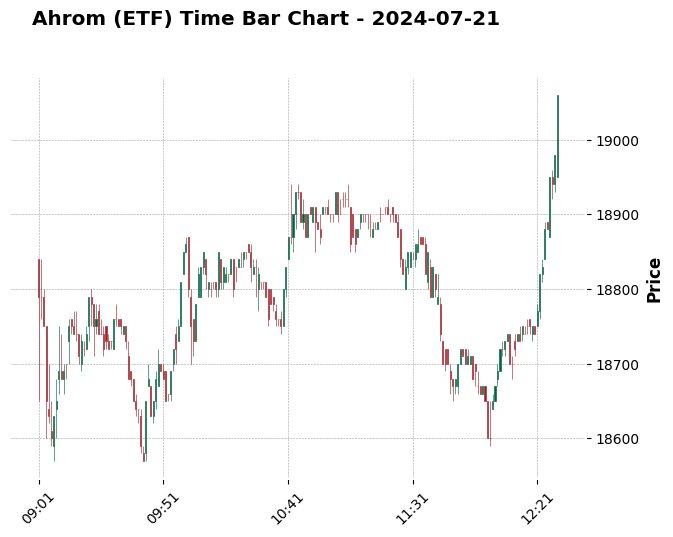

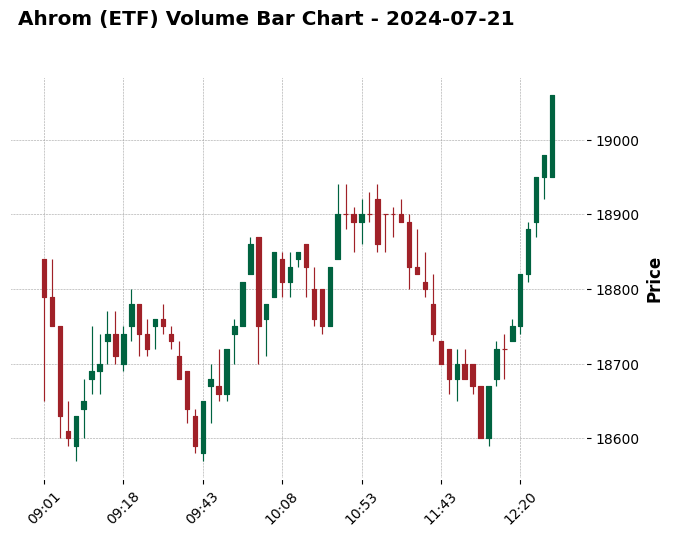

In [14]:
import mplfinance as mpf

date1 = '2024-07-21'

# ----- Time Bar -----
df_ohlc_timebar = dataframe.copy()
df_ohlc_timebar = df_ohlc_timebar.loc[date1]

mpf.plot(df_ohlc_timebar[['Open', 'High', 'Low', 'Close']],
         type='candle', style='charles', title=f'Ahrom (ETF) Time Bar Chart - {date1}', ylabel='Price', volume=False)


# ----- Volume Bar -----
df_ohlc_volumebar = data.copy()
df_ohlc_volumebar['Start_Time'] = pd.to_datetime(df_ohlc_volumebar['Start_Time'])
df_ohlc_volumebar = df_ohlc_volumebar.set_index('Start_Time')
df_ohlc_volumebar = df_ohlc_volumebar.loc[date1]

mpf.plot(df_ohlc_volumebar[['Open', 'High', 'Low', 'Close']],
    type='candle', style='charles', title=f'Ahrom (ETF) Volume Bar Chart - {date1}', ylabel='Price', volume=False)

In [15]:
def calculate_Price_derived(df, lags=[1, 2, 3]):

    df['Price_Range'] = df['High'] - df['Low']
    df['Body_Range'] = np.abs(df['Close'] - df['Open'])
    df['Final_Range'] = np.abs(df['Close'] - df['Final'])
    df['Upper_Shadow'] = df['High'] - np.maximum(df['Close'], df['Open'])
    df['Lower_Shadow'] = np.minimum(df['Close'], df['Open']) - df['Low']
        
    return df

def calculate_volume_features(df, vol_lags=[1, 2, 3], vol_windows=[3, 7]):

    for i in vol_lags:
        df[f'Vol_Change_{i}'] = df['Volume'].diff(i)

    for j in vol_windows:
        df[f'Vol_Avg_Ratio_{j}'] = df['Volume'] / df['Volume'].rolling(window=j).mean()
        
    df['Accum_Dist_Vol'] = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low'])
    return df

def calculate_lag_features(df, lags=[1, 2, 3, 5, 7]):

    for lag in lags:
        df[f'Final_Lag_{lag}'] = df['Final'].shift(lag)
        df[f'Pct_Change_{lag}'] = df['Final'].pct_change(lag)
    return df

def calculate_Rolling_Features(df):

    df['Rolling_Mean_5'] = df['Final'].rolling(5).mean()
    df['Rolling_Std_10'] = df['Final'].rolling(10).std()
    df['Z_Score_10'] = (df['Final'] - df['Final'].rolling(10).mean()) / df['Final'].rolling(10).std()
    return df

def calculate_volatility_breakout(df):
    df['Volatility_Break'] = (df['High'] - df['Low']) / df['Close'].shift(1)
    return df

def calculate_momentum_strength(df):
    df['Momentum_10'] = df['Final'] / df['Final'].shift(10) - 1
    return df

def calculate_trend_consistency(df):
    df['Trend_Up_5'] = df['Final'].rolling(5).apply(lambda x: (x.diff() > 0).mean())
    return df

def calculate_sma(df, window=7):
    df["SMA"] = df['Final'].rolling(window=window).mean()
    return df

def calculate_macd(df):
    ema12 = df['Final'].ewm(span=3, adjust=False).mean()
    ema26 = df['Final'].ewm(span=7, adjust=False).mean()
    df['MACD'] = ema12 - ema26
    df['Signal'] = df['MACD'].ewm(span=7, adjust=False).mean()
    return df

def calculate_obv(df):
    obv = [0]
    for i in range(1, len(df)):
        if df['Final'].iloc[i] > df['Final'].iloc[i - 1]:
            obv.append(obv[-1] + df['Volume'].iloc[i])
        elif df['Final'].iloc[i] < df['Final'].iloc[i - 1]:
            obv.append(obv[-1] - df['Volume'].iloc[i])
        else:
            obv.append(obv[-1])
    df['OBV'] = obv
    return df

def calculate_rsi(df, window=7):
    delta = df['Final'].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

def calculate_adi(df):
    mf_mult = ((df['Final'] - df['Low']) - (df['High'] - df['Final'])) / (df['High'] - df['Low'])
    mf_mult = mf_mult.fillna(0)
    mf_vol = mf_mult * df['Volume']
    df['ADI'] = mf_vol.cumsum()
    return df

def calculate_atr(df, window=7):
    high_low = df['High'] - df['Low']
    high_close = np.abs(df['High'] - df['Final'].shift())
    low_close = np.abs(df['Low'] - df['Final'].shift())
    tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    df['ATR'] = tr.rolling(window=window).mean()
    return df

def calculate_w_price(df, window=7):
    typical_price = (df['High'] + df['Low'] + df['Final']) / 3
    tp_vol = typical_price * df['Volume']
    df['W_Price'] = tp_vol.rolling(window=window).sum() / df['Volume'].rolling(window=window).sum()
    return df

def calculate_mfi(df, window=7):
    tp = (df['High'] + df['Low'] + df['Final']) / 3
    mf = tp * df['Volume']
    positive_flow = []
    negative_flow = []
    for i in range(1, len(tp)):
        if tp.iloc[i] > tp.iloc[i - 1]:
            positive_flow.append(mf.iloc[i])
            negative_flow.append(0)
        else:
            positive_flow.append(0)
            negative_flow.append(mf.iloc[i])
    positive_mf = pd.Series(positive_flow).rolling(window=window).sum()
    negative_mf = pd.Series(negative_flow).rolling(window=window).sum()
    mfi = 100 - (100 / (1 + (positive_mf / negative_mf)))
    df['MFI'] = mfi
    return df

def calculate_cmf(df, window=7):
    mfv = ((df['Final'] - df['Low']) - (df['High'] - df['Final'])) / (df['High'] - df['Low'])
    mfv = mfv.replace([np.inf, -np.inf], 0).fillna(0)
    mfv *= df['Volume']
    df['CMF'] = mfv.rolling(window=window).sum() / df['Volume'].rolling(window=window).sum()
    return df

def calculate_roc(df, period=7):
    df['ROC'] = df['Final'].pct_change(periods=period) * 100
    return df


def compute_all_indicators(df):
    df = calculate_Price_derived(df)
    df = calculate_volume_features(df)
    df = calculate_lag_features(df)
    df = calculate_Rolling_Features(df)
    df = calculate_volatility_breakout(df)
    df = calculate_momentum_strength(df)
    df = calculate_trend_consistency(df)
    df = calculate_sma(df)
    df = calculate_macd(df)
    df = calculate_obv(df)
    df = calculate_rsi(df)
    df = calculate_adi(df)
    df = calculate_atr(df)
    df = calculate_w_price(df)
    df = calculate_mfi(df)
    df = calculate_cmf(df)
    df = calculate_roc(df)
    
    df.dropna(inplace=True)
    return df


df = compute_all_indicators(data)
df = df.drop(columns=['Open','High','Low','Close', 'Volume'])

df['Target'] = np.where(df['Final'].shift(-1) > df['Final'], 1, 0)
df = df.drop(columns=['Final'])

df = df.dropna()
display(df)

,NumTrades,Start_Time,End_Time,V_Duration,Price_Range,Body_Range,Final_Range,Upper_Shadow,Lower_Shadow,Vol_Change_1,...,Signal,OBV,RSI,ADI,ATR,W_Price,MFI,CMF,ROC,Target
10,10,2022-03-28 11:51:00,2022-03-28 12:03:00,12.0,120.0,50.0,60.82,70.0,0.0,-12621.0,...,100.666292,9.775980e+06,98.895501,-1.416157e+06,196.438571,10858.968791,62.798200,-0.190169,3.857465,0
11,19,2022-03-28 12:04:00,2022-03-28 12:29:00,25.0,90.0,50.0,1.09,0.0,40.0,1262318.0,...,98.867380,7.452314e+06,85.352379,-1.730626e+06,182.270000,10897.858647,70.656276,-0.177728,3.008522,0
12,60,2022-03-29 09:13:00,2022-03-29 11:14:00,121.0,240.0,120.0,28.22,80.0,40.0,-1300843.0,...,86.936886,6.429491e+06,74.519111,-2.171975e+06,202.270000,10949.115008,69.714107,-0.120917,2.390980,0
13,50,2022-03-29 11:15:00,2022-03-30 09:17:00,92.0,370.0,30.0,44.42,260.0,80.0,130319.0,...,70.382731,5.276349e+06,67.638707,-2.916343e+06,226.555714,10981.196699,50.871256,-0.144309,1.681031,0
14,16,2022-03-30 09:20:00,2022-03-30 09:50:00,30.0,220.0,220.0,20.41,0.0,0.0,1941191.0,...,43.519124,2.182016e+06,39.888752,-5.436537e+06,200.841429,10942.807074,30.376177,-0.292133,-1.056952,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41733,2,2025-06-09 11:10:00,2025-06-09 11:11:00,1.0,20.0,10.0,2.79,10.0,0.0,-799785.0,...,-7.714054,-1.725245e+09,19.659470,1.111092e+09,25.217143,25640.812960,27.461918,-0.500631,-0.268961,1
41734,3,2025-06-09 11:12:00,2025-06-09 11:14:00,2.0,40.0,20.0,4.87,0.0,20.0,314004.0,...,-6.365215,-1.723656e+09,60.051495,1.110705e+09,20.024286,25638.592078,41.305611,-0.376523,0.039594,1
41735,3,2025-06-09 11:15:00,2025-06-09 11:17:00,2.0,70.0,40.0,2.63,30.0,0.0,-132885.0,...,-1.909662,-1.722200e+09,75.640097,1.111023e+09,23.577143,25643.392102,44.034885,-0.318715,0.165535,0
41736,5,2025-06-09 11:18:00,2025-06-09 11:22:00,4.0,60.0,50.0,26.48,10.0,0.0,-337570.0,...,0.731068,-1.723318e+09,70.545168,1.110891e+09,29.267143,25647.502697,41.590124,-0.172991,0.142333,0


In [16]:
start_backtest = "1404-01-01"

def shamsi_to_gregorian_formatted(shamsi_date_str):
    year, month, day = map(int, shamsi_date_str.split('-'))
    gregorian_date = jdatetime.date(year, month, day).togregorian()
    return gregorian_date.strftime('%Y-%m-%d')

start = shamsi_to_gregorian_formatted(start_backtest)

A = df.copy()
A['Start_Time'] = pd.to_datetime(A['Start_Time'])
A = A[A['Start_Time'] >= pd.Timestamp(start)]

first_valid_time = A['Start_Time'].iloc[0]
first_index = df[df['Start_Time'] == first_valid_time].index[0]

df_ml = df.iloc[:df.index.get_loc(first_index)]

df_train_val = df_ml.iloc[:int(0.7 * len(df_ml))]
df_test = df_ml.iloc[int(0.7 * len(df_ml)):]
df_test = df_test.iloc[9:,:] # Prevent information leakage due to temporal lags in the previous code

df_backtest = df.iloc[df.index.get_loc(first_index):]

# os.makedirs('Excel_Files', exist_ok=True)
# df_backtest.to_excel(f'Excel_Files/df_backtest_{volume_threshold}_{start_backtest}.xlsx')

In [17]:
def combined_feature_report_with_stationarity(df):

    df = df.select_dtypes(exclude=['datetime64[ns]', 'datetime64[ns, UTC]'])

    feature_report = []
    for col in df.columns:
        series = df[col].dropna()
        try:
            _, p_norm = normaltest(series)
            is_normal = p_norm > 0.05
        except Exception:
            p_norm = None
            is_normal = None
        sk = skew(series)
        kt = kurtosis(series, fisher=False)
        try:
            adf_p = adfuller(series)[1]
            stationary = adf_p < 0.05
        except Exception:
            adf_p = None
            stationary = None
        if stationary is not None and not stationary:
            series_diff = series.diff().dropna()
            df[col] = series_diff
            stationary = True
        if kt is not None:
            if kt > 3.5:
                tail = 'Heavy'
            elif kt < 2.5:
                tail = 'Light'
            else:
                tail = 'Normal-ish'
        else:
            tail = None
        feature_report.append({
            'Feature': col,
            'Normal (p>0.05)': is_normal,
            'Skewness': round(sk, 2),
            'Kurtosis': round(kt, 2) if kt is not None else None,
            'Tail Type': tail,
            'Stationary (ADF p<0.05)': stationary
        })

    feature_summary = pd.DataFrame(feature_report)

    transformed_columns = {
        'log_transformed': [],
        'zscore_scaled': [],
        'dropped_constant': []
    }

    for col in df.select_dtypes(include=[np.number]).columns:
        series = df[col].dropna()
        is_constant = series.nunique() == 1
        has_outliers = ((np.abs((series - series.mean()) / series.std()) > 3).sum() > 0)
        skew_val = skew(series)

        if skew_val > 1.0 and (series > 0).all():
            df[col] = np.log1p(df[col])
            transformed_columns['log_transformed'].append(col)
        elif has_outliers:
            df[col] = zscore(df[col].fillna(series.mean()))
            transformed_columns['zscore_scaled'].append(col)
        if is_constant:
            df.drop(columns=[col], inplace=True)
            transformed_columns['dropped_constant'].append(col)

    print("\n📊 Feature Distribution Summary:")
    from IPython.display import display
    display(feature_summary)

    print("\n🔧 Transformations Applied:")
    for key, cols in transformed_columns.items():
        print(f"  ✅ {key.replace('_', ' ').title()}: {', '.join(cols) if cols else 'None'}")

    return df, feature_summary, transformed_columns

# Data Preparation
df_features = df_train_val.drop(columns=['Target'])  
df_transformed, feature_summary, transformed_columns = combined_feature_report_with_stationarity(df_features)
df_transformed = df_transformed.fillna(method='ffill').fillna(method='bfill')

y = df_train_val['Target']
y_aligned = y.loc[df_transformed.index]

# Modeling with Random Forest
def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "auc": roc_auc_score(y_test, y_proba)}

# Evaluate the model using only transformed data
metrics_transformed = evaluate_model(df_transformed, y_aligned)

# Print results
print("\n📊 Model Performance:")
print(f"  - After transformation: Accuracy={metrics_transformed['accuracy']:.3f}, AUC={metrics_transformed['auc']:.3f}")

# Feature importance
print(y.value_counts(normalize=True))
model = RandomForestClassifier(random_state=42)
model.fit(df_transformed, y_aligned)
importances = pd.Series(model.feature_importances_, index=df_transformed.columns)
print("\nFeature Importance:")
print(importances.sort_values(ascending=False))


📊 Feature Distribution Summary:


,Feature,Normal (p>0.05),Skewness,Kurtosis,Tail Type,Stationary (ADF p<0.05)
0,NumTrades,None,5.34,42.40,Heavy,True
1,V_Duration,None,17.19,347.57,Heavy,True
2,Price_Range,None,74.02,6445.26,Heavy,True
3,Body_Range,None,78.72,7009.18,Heavy,True
4,Final_Range,None,26.86,1959.84,Heavy,True
5,Upper_Shadow,None,3.45,28.46,Heavy,True
6,Lower_Shadow,None,4.13,47.75,Heavy,True
7,Vol_Change_1,None,21.79,4171.88,Heavy,True
8,Vol_Change_2,None,0.51,3657.84,Heavy,True
9,Vol_Change_3,None,-0.62,3862.68,Heavy,True



🔧 Transformations Applied:
  ✅ Log Transformed: NumTrades, Price_Range, Vol_Avg_Ratio_3, Vol_Avg_Ratio_7, Rolling_Std_10, Volatility_Break, ATR
  ✅ Zscore Scaled: V_Duration, Body_Range, Final_Range, Upper_Shadow, Lower_Shadow, Vol_Change_1, Vol_Change_2, Vol_Change_3, Final_Lag_1, Pct_Change_1, Final_Lag_2, Pct_Change_2, Final_Lag_3, Pct_Change_3, Final_Lag_5, Pct_Change_5, Final_Lag_7, Pct_Change_7, Rolling_Mean_5, Momentum_10, SMA, MACD, Signal, OBV, ADI, W_Price, CMF, ROC
  ✅ Dropped Constant: None

📊 Model Performance:
  - After transformation: Accuracy=0.710, AUC=0.772
Target
0    0.524717
1    0.475283
Name: proportion, dtype: float64

Feature Importance:
MFI                 0.113102
Accum_Dist_Vol      0.042842
ADI                 0.031006
Final_Range         0.029593
RSI                 0.029010
Pct_Change_1        0.028357
Final_Lag_5         0.027301
CMF                 0.027250
Z_Score_10          0.025817
OBV                 0.025698
Final_Lag_1         0.025077
Final_Lag

### ⚙️ Machine Learning Model Training and Evaluation

This section implements the training, tuning, and evaluation of **Random Forest**, **XGBoost**, and **CatBoost** models using preprocessed *non-topological* features for a time-series classification task.

The workflow includes:
1. **Hyperparameter Tuning**: 
   - Utilizes **Time Series Cross-Validation (TSCV)** with `RandomizedSearchCV` to optimize model hyperparameters.
   - Models are tuned for accuracy using predefined parameter grids specific to each model (Random Forest, XGBoost, CatBoost).
   - Best parameters and cross-validation accuracy are printed for each model.
2. **Model Training**: 
   - The best model configuration from tuning is retrained on the full training dataset.
3. **Model Evaluation**: 
   - Models are evaluated on both training and test sets using **ROC-AUC**, accuracy, and **F1-score**.
   - An optimal classification threshold is determined by maximizing the difference between True Positive Rate (TPR) and False Positive Rate (FPR) on the ROC curve.
   - The **F1-score** is reported with its **95% confidence interval**, calculated via **bootstrap resampling** (1,000 iterations).
   - A confusion matrix and classification report are generated for the test set.
4. **Result Storage and Visualization**:
   - Evaluation metrics (accuracy, F1-score, confidence intervals) are stored in a DataFrame and saved as CSV files.
   - ROC curves are plotted for each model, displaying the AUC.
   - Trained models and results are saved as Joblib files for reproducibility.
5. **Data Handling**:
   - Ensures alignment of training and test data indices with target labels, with error checks for sample size mismatches.
   - Test data is preprocessed using a custom `combined_feature_report_with_stationarity` function and filled using forward and backward filling to handle missing values.

Results are summarized in a table comparing F1-scores and confidence intervals across all models, saved as a CSV file for further analysis.


📊 Feature Distribution Summary:


,Feature,Normal (p>0.05),Skewness,Kurtosis,Tail Type,Stationary (ADF p<0.05)
0,NumTrades,None,21.90,663.63,Heavy,True
1,V_Duration,None,32.99,1530.44,Heavy,True
2,Price_Range,None,97.93,9944.65,Heavy,True
3,Body_Range,None,98.25,9989.33,Heavy,True
4,Final_Range,None,50.22,2706.52,Heavy,True
5,Upper_Shadow,None,6.06,101.65,Heavy,True
6,Lower_Shadow,None,101.15,10419.39,Heavy,True
7,Vol_Change_1,None,12.84,1003.76,Heavy,True
8,Vol_Change_2,None,14.83,800.57,Heavy,True
9,Vol_Change_3,None,13.94,739.71,Heavy,True



🔧 Transformations Applied:
  ✅ Log Transformed: NumTrades, Price_Range, Vol_Avg_Ratio_3, Vol_Avg_Ratio_7, Final_Lag_1, Final_Lag_2, Final_Lag_3, Rolling_Mean_5, Rolling_Std_10, SMA, ATR
  ✅ Zscore Scaled: V_Duration, Body_Range, Final_Range, Upper_Shadow, Lower_Shadow, Vol_Change_1, Vol_Change_2, Vol_Change_3, Pct_Change_1, Pct_Change_2, Pct_Change_3, Final_Lag_5, Pct_Change_5, Final_Lag_7, Pct_Change_7, Volatility_Break, Momentum_10, MACD, Signal, OBV, ADI, W_Price, CMF, ROC
  ✅ Dropped Constant: None

=== تیون مدل: Randomforest ===
Best params for randomforest: {'n_estimators': 250, 'min_samples_split': 20, 'max_depth': 10}
Best CV accuracy: 0.6970

=== Evaluation Results for Randomforest ===
+----+--------------+---------------------+-----------------+-----------------+------------------+------------------+---------------+
|    | Model        |   Training Accuracy |   Test Accuracy |   Test F1-Score |   CI Lower (95%) |   CI Upper (95%) |   Sample Size |
|----+--------------+------

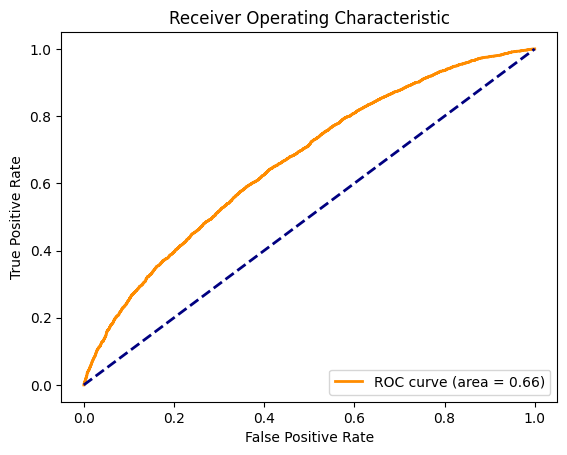


=== تیون مدل: Xgboost ===
Best params for xgboost: {'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1}
Best CV accuracy: 0.7148

=== Evaluation Results for Xgboost ===
+----+---------+---------------------+-----------------+-----------------+------------------+------------------+---------------+
|    | Model   |   Training Accuracy |   Test Accuracy |   Test F1-Score |   CI Lower (95%) |   CI Upper (95%) |   Sample Size |
|----+---------+---------------------+-----------------+-----------------+------------------+------------------+---------------|
|  0 | Xgboost |              0.7375 |          0.6354 |          0.5666 |           0.5537 |           0.5788 |         10828 |
+----+---------+---------------------+-----------------+-----------------+------------------+------------------+---------------+
Optimal threshold: 0.4616

Confusion Matrix (Test):
 [[4299 1537]
 [2411 2581]]

Classification Report (Test):
               precision    rec

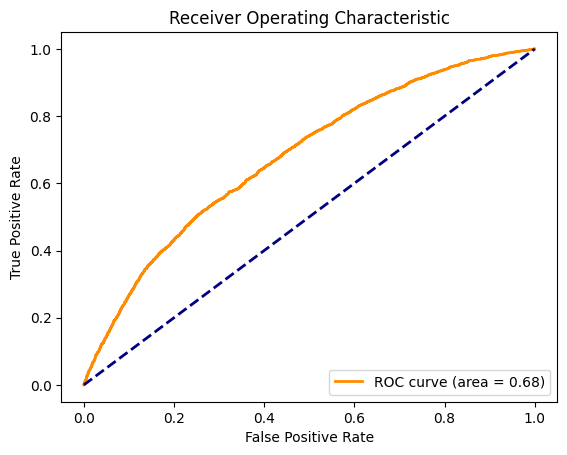


=== تیون مدل: Catboost ===
Best params for catboost: {'n_estimators': 150, 'learning_rate': 0.1}
Best CV accuracy: 0.7164

=== Evaluation Results for Catboost ===
+----+----------+---------------------+-----------------+-----------------+------------------+------------------+---------------+
|    | Model    |   Training Accuracy |   Test Accuracy |   Test F1-Score |   CI Lower (95%) |   CI Upper (95%) |   Sample Size |
|----+----------+---------------------+-----------------+-----------------+------------------+------------------+---------------|
|  0 | Catboost |              0.6644 |          0.6167 |          0.6235 |           0.6127 |           0.6330 |         10828 |
+----+----------+---------------------+-----------------+-----------------+------------------+------------------+---------------+
Optimal threshold: 0.2595

Confusion Matrix (Test):
 [[3242 2594]
 [1556 3436]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       

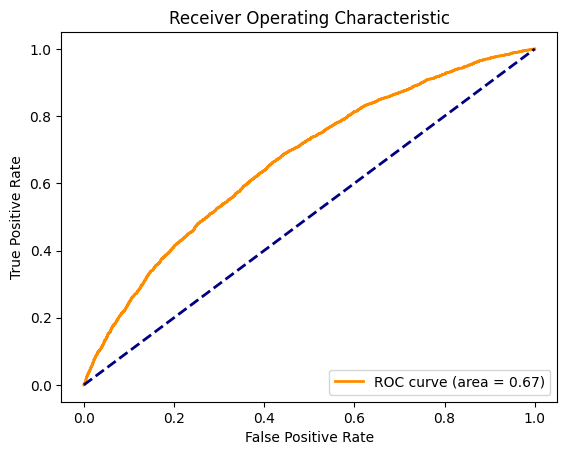


=== Summary of F1-Score Confidence Intervals for All Models ===
+----+--------------+-----------------+------------------+------------------+---------------+
|    | Model        |   Test F1-Score |   CI Lower (95%) |   CI Upper (95%) |   Sample Size |
|----+--------------+-----------------+------------------+------------------+---------------|
|  0 | Randomforest |          0.6042 |           0.5942 |           0.6145 |         10828 |
|  1 | Xgboost      |          0.5666 |           0.5537 |           0.5788 |         10828 |
|  2 | Catboost     |          0.6235 |           0.6127 |           0.6330 |         10828 |
+----+--------------+-----------------+------------------+------------------+---------------+

Summary saved to Joblib_Files/f1_confidence_intervals_summary_1000000_1404-01-01.csv


In [9]:
def tune_model_with_cv(X, y, model_type, n_splits=5, n_iter=20):
    tscv = TimeSeriesSplit(n_splits=n_splits)

    if model_type == 'randomforest':
        model = RandomForestClassifier(random_state=1)
        param_grid = {
            'n_estimators': [100, 150, 200, 250],
            'max_depth': [1, 5, 7, 10],
            'min_samples_split': [5, 10, 20],
        }
    elif model_type == 'xgboost':
        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)
        param_grid = {
            'n_estimators': [10, 25, 50],
            'learning_rate': [0.01, 0.1, 0.2],
            'min_child_weight': [1, 3, 5],
            'max_depth': [3, 5, 7, 9],
            'gamma': [0, 0.1],
        }
    elif model_type == 'catboost':
        model = CatBoostClassifier(verbose=0, random_state=1)
        param_grid = {
            'n_estimators': [25, 50, 100, 150, 200],
            'learning_rate': [0.001, 0.01, 0.1, 0.2]
        }
    else:
        raise ValueError(f"Unsupported model type: {model_type}")

    randomized_search = RandomizedSearchCV(
        model,
        param_distributions=param_grid,
        n_iter=n_iter,
        cv=tscv,
        scoring='accuracy',
        n_jobs=-1,
        random_state=1
    )
    randomized_search.fit(X, y)

    print(f"Best params for {model_type}: {randomized_search.best_params_}")
    print(f"Best CV accuracy: {randomized_search.best_score_:.4f}")

    return randomized_search.best_estimator_

def train_final_model(model, X_train_val, y_train_val):
    model.fit(X_train_val, y_train_val)
    return model

def bootstrap_confidence_interval(y_true, y_pred, metric_func, n_iterations=1000, confidence_level=0.95):
    """
    Calculate confidence interval using bootstrap method
    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - metric_func: Metric function (e.g., f1_score)
    - n_iterations: Number of bootstrap iterations
    - confidence_level: Confidence level (default 95%)
    Returns:
    - (metric_value, lower_bound, upper_bound): Metric value and confidence interval bounds
    """
    if len(y_true) == 0 or len(y_pred) == 0:
        raise ValueError("Input arrays cannot be empty")
    
    n = len(y_true)
    metric_values = []
    
    for _ in range(n_iterations):
        indices = np.random.choice(n, size=n, replace=True)
        y_true_sample = y_true[indices]
        y_pred_sample = y_pred[indices]
        try:
            metric_value = metric_func(y_true_sample, y_pred_sample)
            metric_values.append(metric_value)
        except ValueError:
            continue  # Skip iterations where metric calculation fails (e.g., no positive samples)
    
    if not metric_values:
        raise ValueError("No valid metric values computed during bootstrap")
    
    metric_value = metric_func(y_true, y_pred)
    lower_bound = np.percentile(metric_values, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(metric_values, (1 + confidence_level) / 2 * 100)
    
    return metric_value, lower_bound, upper_bound

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, volume_threshold, start_backtest):
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    y_train_pred = (y_train_prob >= optimal_threshold).astype(int)
    y_test_pred = (y_test_prob >= optimal_threshold).astype(int)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1, ci_lower, ci_upper = bootstrap_confidence_interval(y_test, y_test_pred, f1_score)

    # Store results in a DataFrame
    results = [{
        'Model': model_name.capitalize(),
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Test F1-Score': test_f1,
        'CI Lower (95%)': ci_lower,
        'CI Upper (95%)': ci_upper,
        'Sample Size': len(y_test)
    }]
    results_df = pd.DataFrame(results)

    # Print results in a table
    print(f"\n=== Evaluation Results for {model_name.capitalize()} ===")
    print(tabulate(results_df, headers='keys', tablefmt='psql', floatfmt='.4f'))
    print(f"Optimal threshold: {optimal_threshold:.4f}\n")
    print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))
    print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

    # Save results to CSV
    output_file = f'Joblib_Files/{model_name}_results_{volume_threshold}_{start_backtest}.csv'
    results_df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")

    plot_roc_curve(fpr, tpr, roc_auc)
    
    return y_test_pred, test_f1, ci_lower, ci_upper

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Main execution
os.makedirs('Joblib_Files', exist_ok=True)

# Assuming df_transformed, y_aligned, df_test, volume_threshold, start_backtest are defined
# Align y_aligned with df_transformed's index
df_transformed = df_transformed.loc[df_transformed.index.intersection(y_aligned.index)]
y_aligned = y_aligned.loc[df_transformed.index]

# Convert to NumPy arrays
X_train_val = df_transformed.values
y_train_val = y_aligned.values

# Verify sample sizes match
if len(X_train_val) != len(y_train_val):
    raise ValueError(f"Mismatch in sample sizes: X_train_val has {len(X_train_val)} samples, y_train_val has {len(y_train_val)} samples")

joblib.dump(df_transformed.columns.tolist(), f'Joblib_Files/model_features_{volume_threshold}_{start_backtest}.joblib')

# Process test data
df_features_test = df_test.drop(columns=['Target'])
df_transformed_test, feature_summary, transformed_columns = combined_feature_report_with_stationarity(df_features_test)
df_transformed_test = df_transformed_test.fillna(method='ffill').fillna(method='bfill')
y = df_test['Target']
y_aligned_test = y.loc[df_transformed_test.index]

# Convert test data to NumPy arrays
X_test = df_transformed_test.values
y_test = y_aligned_test.values

# Verify test data sample sizes
if len(X_test) != len(y_test):
    raise ValueError(f"Mismatch in test sample sizes: X_test has {len(X_test)} samples, y_test has {len(y_test)} samples")

models = {}
all_results = []

for model_name in ['randomforest', 'xgboost', 'catboost']:
    print(f"\n=== تیون مدل: {model_name.capitalize()} ===")
    best_model = tune_model_with_cv(X_train_val, y_train_val, model_type=model_name, n_splits=5)

    model = train_final_model(best_model, X_train_val, y_train_val)

    joblib.dump(model, f'Joblib_Files/{model_name}_model_{volume_threshold}_{start_backtest}.joblib')
    models[model_name] = model

    y_test_pred, test_f1, ci_lower, ci_upper = evaluate_model(
        model, X_train_val, X_test, y_train_val, y_test, model_name, volume_threshold, start_backtest
    )

    joblib.dump({
        'model': model,
        'y_test': y_test,
        'y_pred': y_test_pred
    }, f'Joblib_Files/{model_name}_full_result_{volume_threshold}_{start_backtest}.joblib')

    # Collect results for summary table
    all_results.append({
        'Model': model_name.capitalize(),
        'Test F1-Score': test_f1,
        'CI Lower (95%)': ci_lower,
        'CI Upper (95%)': ci_upper,
        'Sample Size': len(y_test)
    })

# Print summary table for all models
all_results_df = pd.DataFrame(all_results)
print("\n=== Summary of F1-Score Confidence Intervals for All Models ===")
print(tabulate(all_results_df, headers='keys', tablefmt='psql', floatfmt='.4f'))

# Save summary to CSV
summary_file = f'Joblib_Files/f1_confidence_intervals_summary_{volume_threshold}_{start_backtest}.csv'
all_results_df.to_csv(summary_file, index=False)
print(f"\nSummary saved to {summary_file}")

# Visualization.py

This script generates visualizations to analyze feature importance and interactions for Random Forest, XGBoost, and CatBoost models. Key functionalities include:

- **Feature Importance Plot**: Visualizes the importance of each feature based on the model's internal feature importance metrics.
- **SHAP Summary Plot**: Illustrates the global impact of features on model predictions using SHAP (SHapley Additive exPlanations) values.
- **SHAP Interaction Plot**: Analyzes interactions between pairs of features (specifically the first two features) using SHAP interaction values.
- Outputs are saved as PNG files in the `Joblib_Files` directory.
- Requires the `shap`, `matplotlib`, `pandas`, and `joblib` libraries.

### Notes:
- The script loads pre-trained models and feature names from the `Joblib_Files` directory, using a naming convention based on `model_name`, `volume_threshold`, and `start_backtest`.
- Test data is preprocessed to match the training data transformations, including handling missing values with forward and backward filling.
- SHAP visualizations are generated using the `TreeExplainer` for tree-based models, ensuring compatibility with Random Forest, XGBoost, and CatBoost.
- A validation check ensures the number of features in the test data matches the loaded feature names.


=== Generating SHAP Summary Plot for Randomforest ===

📊 Feature Distribution Summary:


,Feature,Normal (p>0.05),Skewness,Kurtosis,Tail Type,Stationary (ADF p<0.05)
0,NumTrades,None,21.90,663.63,Heavy,True
1,V_Duration,None,32.99,1530.44,Heavy,True
2,Price_Range,None,97.93,9944.65,Heavy,True
3,Body_Range,None,98.25,9989.33,Heavy,True
4,Final_Range,None,50.22,2706.52,Heavy,True
5,Upper_Shadow,None,6.06,101.65,Heavy,True
6,Lower_Shadow,None,101.15,10419.39,Heavy,True
7,Vol_Change_1,None,12.84,1003.76,Heavy,True
8,Vol_Change_2,None,14.83,800.57,Heavy,True
9,Vol_Change_3,None,13.94,739.71,Heavy,True



🔧 Transformations Applied:
  ✅ Log Transformed: NumTrades, Price_Range, Vol_Avg_Ratio_3, Vol_Avg_Ratio_7, Final_Lag_1, Final_Lag_2, Final_Lag_3, Rolling_Mean_5, Rolling_Std_10, SMA, ATR
  ✅ Zscore Scaled: V_Duration, Body_Range, Final_Range, Upper_Shadow, Lower_Shadow, Vol_Change_1, Vol_Change_2, Vol_Change_3, Pct_Change_1, Pct_Change_2, Pct_Change_3, Final_Lag_5, Pct_Change_5, Final_Lag_7, Pct_Change_7, Volatility_Break, Momentum_10, MACD, Signal, OBV, ADI, W_Price, CMF, ROC
  ✅ Dropped Constant: None


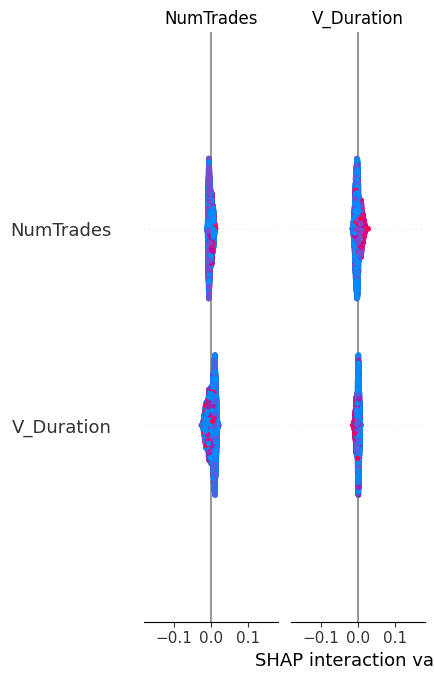


=== Generating SHAP Summary Plot for Xgboost ===

📊 Feature Distribution Summary:


,Feature,Normal (p>0.05),Skewness,Kurtosis,Tail Type,Stationary (ADF p<0.05)
0,NumTrades,None,21.90,663.63,Heavy,True
1,V_Duration,None,32.99,1530.44,Heavy,True
2,Price_Range,None,97.93,9944.65,Heavy,True
3,Body_Range,None,98.25,9989.33,Heavy,True
4,Final_Range,None,50.22,2706.52,Heavy,True
5,Upper_Shadow,None,6.06,101.65,Heavy,True
6,Lower_Shadow,None,101.15,10419.39,Heavy,True
7,Vol_Change_1,None,12.84,1003.76,Heavy,True
8,Vol_Change_2,None,14.83,800.57,Heavy,True
9,Vol_Change_3,None,13.94,739.71,Heavy,True



🔧 Transformations Applied:
  ✅ Log Transformed: NumTrades, Price_Range, Vol_Avg_Ratio_3, Vol_Avg_Ratio_7, Final_Lag_1, Final_Lag_2, Final_Lag_3, Rolling_Mean_5, Rolling_Std_10, SMA, ATR
  ✅ Zscore Scaled: V_Duration, Body_Range, Final_Range, Upper_Shadow, Lower_Shadow, Vol_Change_1, Vol_Change_2, Vol_Change_3, Pct_Change_1, Pct_Change_2, Pct_Change_3, Final_Lag_5, Pct_Change_5, Final_Lag_7, Pct_Change_7, Volatility_Break, Momentum_10, MACD, Signal, OBV, ADI, W_Price, CMF, ROC
  ✅ Dropped Constant: None


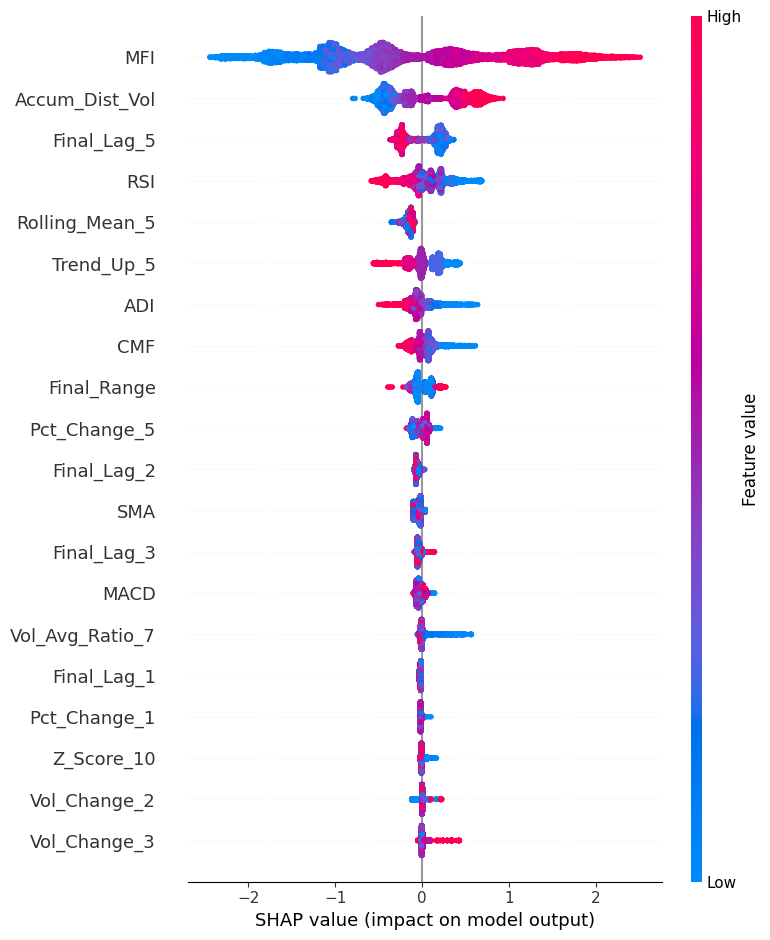


=== Generating SHAP Summary Plot for Catboost ===

📊 Feature Distribution Summary:


,Feature,Normal (p>0.05),Skewness,Kurtosis,Tail Type,Stationary (ADF p<0.05)
0,NumTrades,None,21.90,663.63,Heavy,True
1,V_Duration,None,32.99,1530.44,Heavy,True
2,Price_Range,None,97.93,9944.65,Heavy,True
3,Body_Range,None,98.25,9989.33,Heavy,True
4,Final_Range,None,50.22,2706.52,Heavy,True
5,Upper_Shadow,None,6.06,101.65,Heavy,True
6,Lower_Shadow,None,101.15,10419.39,Heavy,True
7,Vol_Change_1,None,12.84,1003.76,Heavy,True
8,Vol_Change_2,None,14.83,800.57,Heavy,True
9,Vol_Change_3,None,13.94,739.71,Heavy,True



🔧 Transformations Applied:
  ✅ Log Transformed: NumTrades, Price_Range, Vol_Avg_Ratio_3, Vol_Avg_Ratio_7, Final_Lag_1, Final_Lag_2, Final_Lag_3, Rolling_Mean_5, Rolling_Std_10, SMA, ATR
  ✅ Zscore Scaled: V_Duration, Body_Range, Final_Range, Upper_Shadow, Lower_Shadow, Vol_Change_1, Vol_Change_2, Vol_Change_3, Pct_Change_1, Pct_Change_2, Pct_Change_3, Final_Lag_5, Pct_Change_5, Final_Lag_7, Pct_Change_7, Volatility_Break, Momentum_10, MACD, Signal, OBV, ADI, W_Price, CMF, ROC
  ✅ Dropped Constant: None


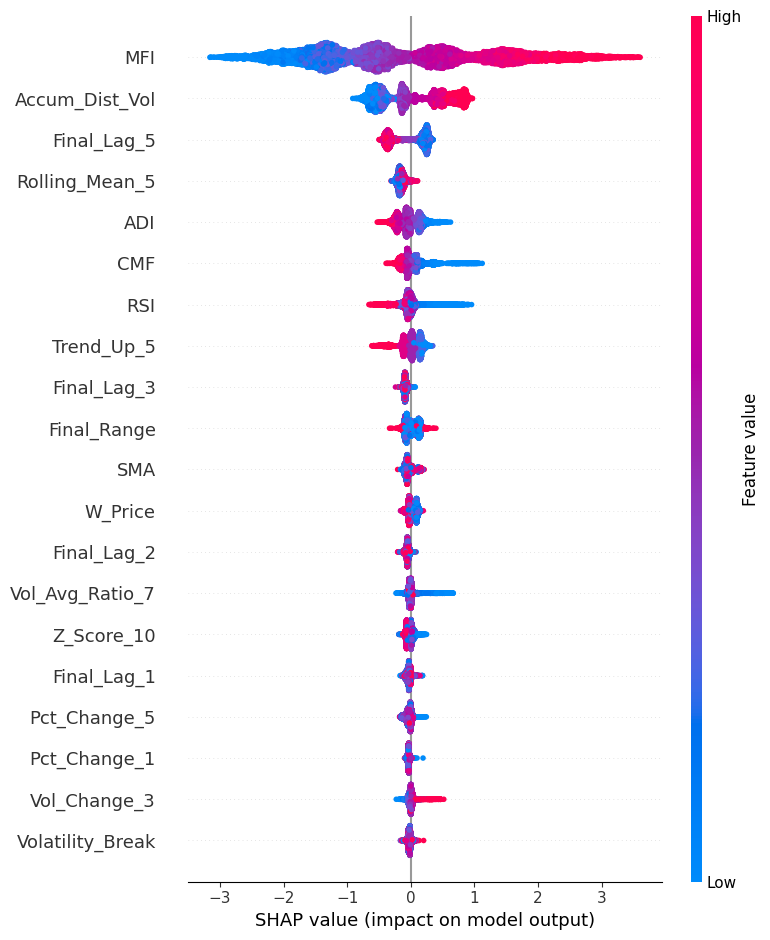

In [ ]:
# Iterate over each trained model
for model_name in ['randomforest', 'xgboost', 'catboost']:
    print(f"\n=== Generating SHAP Summary Plot for {model_name.capitalize()} ===")
    
    # Load the trained model
    model = joblib.load(f'Joblib_Files/{model_name}_model_{volume_threshold}_{start_backtest}.joblib')
    
    # Load the preprocessed feature names
    feature_names = joblib.load(f'Joblib_Files/model_features_{volume_threshold}_{start_backtest}.joblib')
    
    # Recreate or load the preprocessed test data
    # Since df_transformed_test is not directly available, use df_test and apply the same transformation
    df_features_test = df_test.drop(columns=['Target'])
    df_transformed_test, _, _ = combined_feature_report_with_stationarity(df_features_test)
    df_transformed_test = df_transformed_test.fillna(method='ffill').fillna(method='bfill')
    X_test = df_transformed_test.values
    
    # Ensure the number of features matches
    if len(feature_names) != X_test.shape[1]:
        raise ValueError(f"Mismatch in feature count: {len(feature_names)} feature names but {X_test.shape[1]} columns in X_test")
    
    # Create a TreeExplainer object
    explainer = shap.TreeExplainer(model)
    
    # Calculate SHAP values for the test set
    shap_values = explainer.shap_values(X_test)
    
    # Generate the SHAP summary plot
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)

****
****

### ⚙️ Machine Learning Models with Non-Topological and TDA-Based Features

This section trains and tunes **Random Forest**, **XGBoost**, and **CatBoost** models using a combination of *non-topological* and **Topological Data Analysis (TDA)** features, with enhanced data alignment and robust handling of missing values.

The workflow includes:
1. **Data Alignment and Validation**: Aligning training and test data indices with target labels and verifying sample size consistency to ensure data integrity.
2. **Feature Selection**: Identifying the top 7 features based on model-specific importance, with missing values handled using forward and backward filling to preserve temporal continuity.
3. **TDA Preprocessing**: Applying logarithmic transformation for skewed features, clipping outliers to ±3 standard deviations, and normalizing data using `StandardScaler` for TDA feature extraction, with missing values filled using forward and backward methods.
4. **TDA Feature Extraction**: Computing TDA features (Persistence Entropy, Betti Number, Mean Lifetime, Persistent Holes) using a sliding window approach, with window size and maximum edge length tuned via **Time Series Cross-Validation (TSCV)**.
5. **Data Preprocessing**: Applying robust scaling with `RobustScaler`, winsorizing data at 5% limits to handle outliers, and adding lagged features (lags of 1, 3, and 5) for non-topological features, with missing values filled using forward and backward methods.
6. **Model Tuning and Training**: Performing hyperparameter tuning using **TSCV** and `RandomizedSearchCV` with ROC-AUC scoring, followed by retraining on the full dataset with **SMOTE** for class balancing to address class imbalance.
7. **Evaluation**: Assessing models on the test set using **ROC-AUC**, classification metrics (accuracy, confusion matrix, classification report), and **F1-score** with a **95% confidence interval** estimated via **bootstrap resampling**. An optimal classification threshold is determined by maximizing the difference between true positive rate and false positive rate.

Results, including model performance metrics, TDA tuning outcomes, and processed datasets, are saved as Excel and Joblib files for further analysis and reproducibility.


=== Processing Randomforest ===
Important features for randomforest: ['MFI', 'Accum_Dist_Vol', 'RSI', 'Final_Range', 'Pct_Change_1', 'Z_Score_10', 'CMF']
Testing window_size=20, max_edge_length=0.5 for randomforest
Rips(maxdim=1, thresh=0.5, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Window size 20, max_edge_length 0.5: Mean AUC=0.754
Testing window_size=20, max_edge_length=1.0 for randomforest
Rips(maxdim=1, thresh=1.0, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Window size 20, max_edge_length 1.0: Mean AUC=0.754
Testing window_size=20, max_edge_length=1.5 for randomforest
Rips(maxdim=1, thresh=1.5, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Window size 20, max_edge_length 1.5: Mean AUC=0.755
Testing window_size=20, max_edge_length=2.0 for randomforest
Rips(maxdim=1, thresh=2.0, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Window size 20, max_edge_length 2.0: Mean AUC=0.754
Testing window_size=30, max_edge_length=0.5 for randomfor

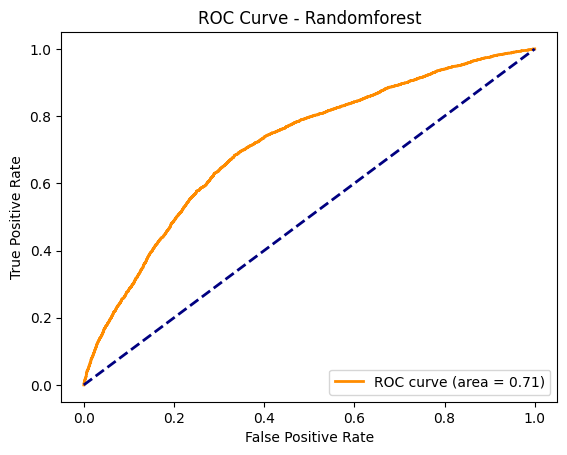


=== Processing Xgboost ===
Important features for xgboost: ['MFI', 'Final_Range', 'Accum_Dist_Vol', 'RSI', 'Trend_Up_5', 'MACD', 'Pct_Change_7']
Testing window_size=20, max_edge_length=0.5 for xgboost
Rips(maxdim=1, thresh=0.5, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Window size 20, max_edge_length 0.5: Mean AUC=0.750
Testing window_size=20, max_edge_length=1.0 for xgboost
Rips(maxdim=1, thresh=1.0, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Window size 20, max_edge_length 1.0: Mean AUC=0.751
Testing window_size=20, max_edge_length=1.5 for xgboost
Rips(maxdim=1, thresh=1.5, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Window size 20, max_edge_length 1.5: Mean AUC=0.751
Testing window_size=20, max_edge_length=2.0 for xgboost
Rips(maxdim=1, thresh=2.0, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Window size 20, max_edge_length 2.0: Mean AUC=0.749
Testing window_size=30, max_edge_length=0.5 for xgboost
Rips(maxdim=1, thresh=0.5, coe

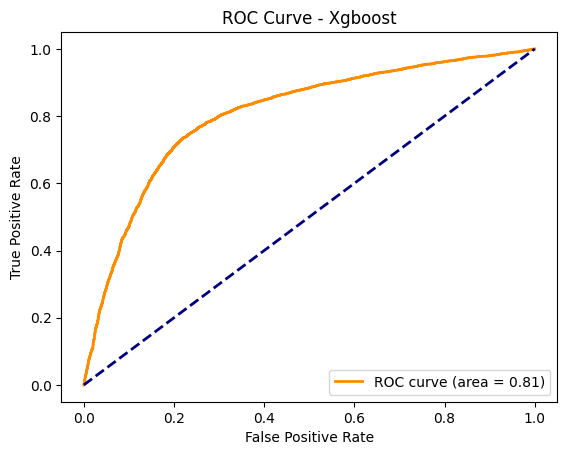


=== Processing Catboost ===
Important features for catboost: ['MFI', 'Accum_Dist_Vol', 'RSI', 'Final_Range', 'Trend_Up_5', 'CMF', 'Pct_Change_5']
Testing window_size=20, max_edge_length=0.5 for catboost
Rips(maxdim=1, thresh=0.5, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Window size 20, max_edge_length 0.5: Mean AUC=0.778
Testing window_size=20, max_edge_length=1.0 for catboost
Rips(maxdim=1, thresh=1.0, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Window size 20, max_edge_length 1.0: Mean AUC=0.778
Testing window_size=20, max_edge_length=1.5 for catboost
Rips(maxdim=1, thresh=1.5, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Window size 20, max_edge_length 1.5: Mean AUC=0.777
Testing window_size=20, max_edge_length=2.0 for catboost
Rips(maxdim=1, thresh=2.0, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Window size 20, max_edge_length 2.0: Mean AUC=0.777
Testing window_size=30, max_edge_length=0.5 for catboost
Rips(maxdim=1, thresh=0.

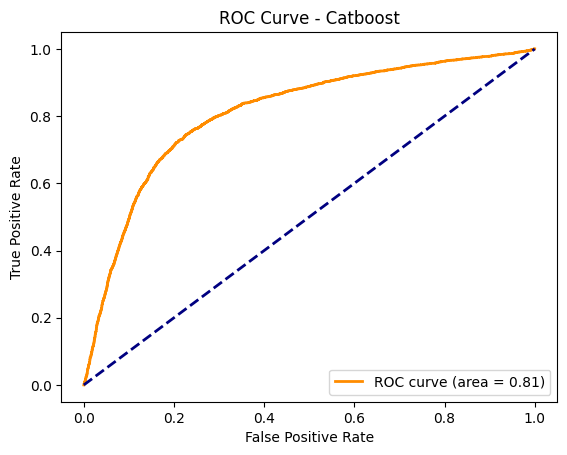


=== Summary of F1-Score Confidence Intervals for All Models ===
+----+--------------+-----------------+------------------+------------------+------------+---------------+
|    | Model        |   Test F1-Score |   CI Lower (95%) |   CI Upper (95%) |   Test AUC |   Sample Size |
|----+--------------+-----------------+------------------+------------------+------------+---------------|
|  0 | Randomforest |          0.6594 |           0.6491 |           0.6691 |     0.7138 |         10828 |
|  1 | Xgboost      |          0.7379 |           0.7281 |           0.7472 |     0.8065 |         10828 |
|  2 | Catboost     |          0.7411 |           0.7312 |           0.7510 |     0.8110 |         10828 |
+----+--------------+-----------------+------------------+------------------+------------+---------------+

Summary saved to Excel_Files/f1_confidence_intervals_summary_example_threshold_example_date.xlsx

Processing and prediction for all models completed successfully!


In [11]:
def select_important_features(df, target, model_type, top_n=7):
    """
    Select top N features based on feature importance for the specified model
    """
    X = df.select_dtypes(include=[np.number]).fillna(method='ffill').fillna(method='bfill')
    y = target
    
    if model_type == 'randomforest':
        model = RandomForestClassifier(n_estimators=100, random_state=1)
    elif model_type == 'xgboost':
        model = XGBClassifier(objective='binary:logistic', random_state=1)
    elif model_type == 'catboost':
        model = CatBoostClassifier(verbose=0, random_state=1)
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
    
    model.fit(X, y)
    importances = pd.Series(model.feature_importances_, index=X.columns)
    important_features = importances.nlargest(top_n).index.tolist()
    return important_features, importances

def preprocess_for_tda(df, features):
    """
    Preprocess features for TDA: logarithm, normalization, and outlier handling
    """
    df_tda = df[features].copy()
    df_tda = df_tda.fillna(method='ffill').fillna(method='bfill')
    
    for col in df_tda.columns:
        if skew(df_tda[col].dropna()) > 1.0 and (df_tda[col] > 0).all():
            df_tda[col] = np.log1p(df_tda[col])
    
    for col in df_tda.columns:
        z_scores = np.abs((df_tda[col] - df_tda[col].mean()) / df_tda[col].std())
        df_tda[col] = np.clip(df_tda[col], df_tda[col].mean() - 3 * df_tda[col].std(), 
                              df_tda[col].mean() + 3 * df_tda[col].std())
    
    scaler = StandardScaler()
    df_tda = pd.DataFrame(scaler.fit_transform(df_tda), columns=df_tda.columns, index=df_tda.index)
    return df_tda, scaler

def extract_tda_features(df, window_size=50, max_edge_length=2.0):
    """
    Extract TDA features using a sliding window
    """
    rips = Rips(maxdim=1, thresh=max_edge_length)
    tda_entropy = []
    tda_betti = []
    tda_mean_lifetime = []
    tda_persistent_holes = []
    
    for i in range(window_size, len(df)):
        window_data = df.iloc[i-window_size:i].values
        diagrams = rips.fit_transform(window_data)[1]
        
        lifetimes = [d[1] - d[0] for d in diagrams if d[1] < np.inf]
        entropy = 0
        if len(lifetimes) > 0:
            lifetimes = np.array(lifetimes)
            p = lifetimes / np.sum(lifetimes)
            entropy = -np.sum(p * np.log(p + 1e-10))
        
        betti = len([d for d in diagrams if d[1] - d[0] > 0.1])
        mean_lifetime = np.mean(lifetimes) if len(lifetimes) > 0 else 0
        persistent_holes = len([d for d in diagrams if d[1] - d[0] > 0.5])
        
        tda_entropy.append(entropy)
        tda_betti.append(betti)
        tda_mean_lifetime.append(mean_lifetime)
        tda_persistent_holes.append(persistent_holes)
    
    tda_entropy = [np.nan] * window_size + tda_entropy
    tda_betti = [np.nan] * window_size + tda_betti
    tda_mean_lifetime = [np.nan] * window_size + tda_mean_lifetime
    tda_persistent_holes = [np.nan] * window_size + tda_persistent_holes
    return tda_entropy, tda_betti, tda_mean_lifetime, tda_persistent_holes

def tune_tda_params(df, target, features, model_type, window_sizes=[20, 30, 50, 75], max_edge_lengths=[0.5, 1.0, 1.5, 2.0], n_splits=5):
    """
    Tune window size and max_edge_length for the specified model
    """
    tscv = TimeSeriesSplit(n_splits=n_splits)
    results = []
    
    df_tda, _ = preprocess_for_tda(df, features)
    
    for window_size in window_sizes:
        for max_edge_length in max_edge_lengths:
            print(f"Testing window_size={window_size}, max_edge_length={max_edge_length} for {model_type}")
            entropy, betti, mean_lifetime, persistent_holes = extract_tda_features(df_tda, window_size, max_edge_length)
            
            df_temp = df.copy()
            df_temp[f'Persistence_Entropy_{model_type}'] = entropy
            df_temp[f'Betti_Number_{model_type}'] = betti
            df_temp[f'Mean_Lifetime_{model_type}'] = mean_lifetime
            df_temp[f'Persistent_Holes_{model_type}'] = persistent_holes
            df_temp = df_temp.fillna(method='ffill').fillna(method='bfill')
            
            auc_scores = []
            for train_idx, val_idx in tscv.split(df_temp):
                X_train = df_temp.iloc[train_idx][features + [f'Persistence_Entropy_{model_type}', f'Betti_Number_{model_type}', 
                                                             f'Mean_Lifetime_{model_type}', f'Persistent_Holes_{model_type}']]
                y_train = target.iloc[train_idx]
                X_val = df_temp.iloc[val_idx][features + [f'Persistence_Entropy_{model_type}', f'Betti_Number_{model_type}', 
                                                         f'Mean_Lifetime_{model_type}', f'Persistent_Holes_{model_type}']]
                y_val = target.iloc[val_idx]
                
                if model_type == 'randomforest':
                    model = RandomForestClassifier(n_estimators=100, random_state=1)
                elif model_type == 'xgboost':
                    model = XGBClassifier(objective='binary:logistic', random_state=1)
                elif model_type == 'catboost':
                    model = CatBoostClassifier(verbose=0, random_state=1)
                
                model.fit(X_train, y_train)
                y_proba = model.predict_proba(X_val)[:, 1]
                auc_scores.append(roc_auc_score(y_val, y_proba))
            
            mean_auc = np.mean(auc_scores)
            results.append({'window_size': window_size, 'max_edge_length': max_edge_length, 'mean_auc': mean_auc})
            print(f"Window size {window_size}, max_edge_length {max_edge_length}: Mean AUC={mean_auc:.3f}")
    
    best_result = max(results, key=lambda x: x['mean_auc'])
    print(f"\nBest parameters for {model_type}: {best_result}")
    return best_result, pd.DataFrame(results)

def preprocess_data(df, selected_features, model_type, lags=[1, 3, 5]):
    """
    Preprocess data with robust scaling, winsorization, and lagged features
    """
    features = selected_features + [f'Persistence_Entropy_{model_type}', f'Betti_Number_{model_type}', 
                                   f'Mean_Lifetime_{model_type}', f'Persistent_Holes_{model_type}']
    missing_cols = [col for col in features if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Columns {missing_cols} not found in DataFrame")
    df_selected = df[features].copy()
    
    for col in df_selected.columns:
        df_selected[col] = winsorize(df_selected[col], limits=[0.05, 0.05])
    
    scaler = RobustScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns, index=df_selected.index)
    
    for lag in lags:
        for col in selected_features:
            df_scaled[f'{col}_lag_{lag}'] = df_scaled[col].shift(lag)
    
    df_scaled = df_scaled.fillna(method='ffill').fillna(method='bfill')
    return df_scaled, scaler

def tune_model_with_cv(X, y, model_type, n_splits=5):
    """
    Tune model using RandomizedSearchCV with time-series cross-validation
    """
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    if model_type == 'randomforest':
        model = RandomForestClassifier(random_state=1, class_weight='balanced')
        param_grid = {
            'n_estimators': [100, 150, 200],
            'max_depth': [3, 5, 7],
            'min_samples_split': [20, 30, 40],
            'min_samples_leaf': [10, 20]
        }
    elif model_type == 'xgboost':
        model = XGBClassifier(objective='binary:logistic', random_state=1)
        param_grid = {
            'n_estimators': [25, 50, 100],
            'learning_rate': [0.01, 0.1],
            'min_child_weight': [3, 5, 7],
            'max_depth': [3, 5],
            'gamma': [0.1, 0.3],
            'subsample': [0.7, 0.8],
            'colsample_bytree': [0.7, 0.8]
        }
    elif model_type == 'catboost':
        model = CatBoostClassifier(verbose=0, random_state=1, auto_class_weights='Balanced')
        param_grid = {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1],
            'depth': [3, 5],
            'l2_leaf_reg': [3, 5],
            'bagging_temperature': [0.5, 1.0]
        }
    else:
        raise ValueError(f"Unsupported model type: {model_type}")

    search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=tscv, scoring='roc_auc', n_jobs=-1, random_state=1)
    search.fit(X, y)

    print(f"Best parameters for {model_type}: {search.best_params_}")
    print(f"Best CV AUC: {search.best_score_:.4f}")

    if model_type == 'xgboost':
        best_model = XGBClassifier(**search.best_params_, objective='binary:logistic', random_state=1)
    else:
        best_model = search.best_estimator_

    return best_model

def train_final_model(model, X_train_val, y_train_val):
    """
    Train final model with Early Stopping for XGBoost and CatBoost
    """
    if isinstance(model, XGBClassifier):
        model.set_params(
            eval_metric='logloss',
            early_stopping_rounds=10,
            use_label_encoder=False
        )
        model.fit(
            X_train_val,
            y_train_val,
            eval_set=[(X_train_val, y_train_val)],
            verbose=False
        )
    elif isinstance(model, CatBoostClassifier):
        model.fit(
            X_train_val,
            y_train_val,
            early_stopping_rounds=10,
            eval_set=(X_train_val, y_train_val),
            verbose=False
        )
    else:
        model.fit(X_train_val, y_train_val)
    return model

def bootstrap_confidence_interval(y_true, y_pred, metric_func, n_iterations=1000, confidence_level=0.95):
    """
    Calculate confidence interval using bootstrap method
    """
    if len(y_true) == 0 or len(y_pred) == 0:
        raise ValueError("Input arrays cannot be empty")
    
    n = len(y_true)
    metric_values = []
    
    for _ in range(n_iterations):
        indices = np.random.choice(n, size=n, replace=True)
        y_true_sample = y_true[indices]
        y_pred_sample = y_pred[indices]
        try:
            metric_value = metric_func(y_true_sample, y_pred_sample)
            metric_values.append(metric_value)
        except ValueError:
            continue
    
    if not metric_values:
        raise ValueError("No valid metric values computed during bootstrap")
    
    metric_value = metric_func(y_true, y_pred)
    lower_bound = np.percentile(metric_values, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(metric_values, (1 + confidence_level) / 2 * 100)
    
    return metric_value, lower_bound, upper_bound

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, volume_threshold, start_backtest):
    """
    Evaluate model, calculate F1-Score with confidence interval, and plot ROC curve
    """
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    y_train_pred = (y_train_prob >= optimal_threshold).astype(int)
    y_test_pred = (y_test_prob >= optimal_threshold).astype(int)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1, ci_lower, ci_upper = bootstrap_confidence_interval(y_test, y_test_pred, f1_score)

    results = [{
        'Model': model_name.capitalize(),
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Test F1-Score': test_f1,
        'CI Lower (95%)': ci_lower,
        'CI Upper (95%)': ci_upper,
        'Test AUC': roc_auc,
        'Sample Size': len(y_test)
    }]
    results_df = pd.DataFrame(results)

    print(f"\n=== Evaluation Results for {model_name.capitalize()} ===")
    print(tabulate(results_df, headers='keys', tablefmt='psql', floatfmt='.4f'))
    print(f"Optimal threshold: {optimal_threshold:.4f}")
    print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

    output_file = f'Excel_Files/{model_name}_results_{volume_threshold}_{start_backtest}.xlsx'
    results_df.to_excel(output_file, index=False)
    print(f"Results saved to {output_file}")

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name.capitalize()}')
    plt.legend(loc="lower right")
    plt.show()

    return optimal_threshold, y_test_pred, test_f1, ci_lower, ci_upper, roc_auc

# Main execution
os.makedirs('Joblib_Files', exist_ok=True)
os.makedirs('Excel_Files', exist_ok=True)

# Align data
df_train_val = df_train_val.loc[df_train_val.index.intersection(df_train_val['Target'].index)]
y_train_val = df_train_val['Target']
df_test = df_test.loc[df_test.index.intersection(df_test['Target'].index)]
y_test = df_test['Target']

# Verify sample sizes
if len(df_train_val) != len(y_train_val):
    raise ValueError(f"Mismatch in sample sizes: df_train_val has {len(df_train_val)} samples, y_train_val has {len(y_train_val)} samples")
if len(df_test) != len(y_test):
    raise ValueError(f"Mismatch in test sample sizes: df_test has {len(df_test)} samples, y_test has {len(y_test)} samples")

models = ['randomforest', 'xgboost', 'catboost']
model_features = {}
model_params = {}
tuning_results = {}
all_results = []

volume_threshold = 'example_threshold'
start_backtest = 'example_date'

for model_name in models:
    print(f"\n=== Processing {model_name.capitalize()} ===")
    
    # Select important features
    selected_features, importances = select_important_features(
        df_train_val.drop(columns=['Target']), df_train_val['Target'], model_name, top_n=7
    )
    print(f"Important features for {model_name}: {selected_features}")
    model_features[model_name] = selected_features
    
    # Tune TDA parameters
    best_params, window_results = tune_tda_params(
        df_train_val, df_train_val['Target'], selected_features, model_name
    )
    model_params[model_name] = best_params
    tuning_results[model_name] = window_results
    
    # Preprocess data for TDA
    df_tda_train, scaler_tda = preprocess_for_tda(df_train_val, selected_features)
    df_tda_test, _ = preprocess_for_tda(df_test, selected_features)
    
    # Extract TDA features
    entropy_train, betti_train, mean_lifetime_train, persistent_holes_train = extract_tda_features(
        df_tda_train, best_params['window_size'], best_params['max_edge_length']
    )
    entropy_test, betti_test, mean_lifetime_test, persistent_holes_test = extract_tda_features(
        df_tda_test, best_params['window_size'], best_params['max_edge_length']
    )
    
    # Add TDA features to DataFrames
    df_train_val[f'Persistence_Entropy_{model_name}'] = entropy_train
    df_train_val[f'Betti_Number_{model_name}'] = betti_train
    df_train_val[f'Mean_Lifetime_{model_name}'] = mean_lifetime_train
    df_train_val[f'Persistent_Holes_{model_name}'] = persistent_holes_train
    df_test[f'Persistence_Entropy_{model_name}'] = entropy_test
    df_test[f'Betti_Number_{model_name}'] = betti_test
    df_test[f'Mean_Lifetime_{model_name}'] = mean_lifetime_test
    df_test[f'Persistent_Holes_{model_name}'] = persistent_holes_test
    
    # Fill NaN values for TDA features
    df_train_val[[f'Persistence_Entropy_{model_name}', f'Betti_Number_{model_name}', 
                  f'Mean_Lifetime_{model_name}', f'Persistent_Holes_{model_name}']] = \
        df_train_val[[f'Persistence_Entropy_{model_name}', f'Betti_Number_{model_name}', 
                      f'Mean_Lifetime_{model_name}', f'Persistent_Holes_{model_name}']].fillna(method='ffill').fillna(method='bfill')
    df_test[[f'Persistence_Entropy_{model_name}', f'Betti_Number_{model_name}', 
             f'Mean_Lifetime_{model_name}', f'Persistent_Holes_{model_name}']] = \
        df_test[[f'Persistence_Entropy_{model_name}', f'Betti_Number_{model_name}', 
                 f'Mean_Lifetime_{model_name}', f'Persistent_Holes_{model_name}']].fillna(method='ffill').fillna(method='bfill')
    
    # Preprocess data for training
    df_transformed, scaler = preprocess_data(df_train_val, selected_features, model_name)
    X_train_val = df_transformed.values
    y_train_val = df_train_val['Target'].values
    
    df_features_test = df_test[selected_features + [f'Persistence_Entropy_{model_name}', f'Betti_Number_{model_name}', 
                                                  f'Mean_Lifetime_{model_name}', f'Persistent_Holes_{model_name}']]
    df_transformed_test, _ = preprocess_data(df_features_test, selected_features, model_name)
    X_test = df_transformed_test.values
    y_test = df_test['Target'].loc[df_transformed_test.index].values
    
    # Verify test data sample sizes
    if len(X_test) != len(y_test):
        raise ValueError(f"Mismatch in test sample sizes: X_test has {len(X_test)} samples, y_test has {len(y_test)} samples")
    
    # Save features
    joblib.dump(df_transformed.columns.tolist(), f'Joblib_Files/model_features_{model_name}_{volume_threshold}_{start_backtest}.joblib')
    
    # Apply SMOTE for class balancing
    smote = SMOTE(random_state=1)
    X_train_val, y_train_val = smote.fit_resample(X_train_val, y_train_val)
    
    # Tune and train model
    best_model = tune_model_with_cv(X_train_val, y_train_val, model_type=model_name, n_splits=5)
    model = train_final_model(best_model, X_train_val, y_train_val)
    
    # Save model
    joblib.dump(model, f'Joblib_Files/{model_name}_model_{volume_threshold}_{start_backtest}.joblib')
    
    # Evaluate model
    optimal_threshold, y_test_pred, test_f1, ci_lower, ci_upper, roc_auc = evaluate_model(
        model, X_train_val, X_test, y_train_val, y_test, model_name, volume_threshold, start_backtest
    )
    
    # Save results
    joblib.dump({
        'model': model,
        'y_test': y_test,
        'y_pred': y_test_pred
    }, f'Joblib_Files/{model_name}_full_result_{volume_threshold}_{start_backtest}.joblib')

    # Collect results for summary table
    all_results.append({
        'Model': model_name.capitalize(),
        'Test F1-Score': test_f1,
        'CI Lower (95%)': ci_lower,
        'CI Upper (95%)': ci_upper,
        'Test AUC': roc_auc,
        'Sample Size': len(y_test)
    })

# Save DataFrames and tuning results
df_train_val.to_excel(f'Excel_Files/df_train_val_with_tda_{volume_threshold}_{start_backtest}.xlsx')
df_test.to_excel(f'Excel_Files/df_test_with_tda_{volume_threshold}_{start_backtest}.xlsx')
for model_name, results in tuning_results.items():
    results.to_excel(f'Excel_Files/window_tuning_results_{model_name}_{volume_threshold}_{start_backtest}.xlsx')

# Print summary table for all models
all_results_df = pd.DataFrame(all_results)
print("\n=== Summary of F1-Score Confidence Intervals for All Models ===")
print(tabulate(all_results_df, headers='keys', tablefmt='psql', floatfmt='.4f'))

# Save summary to Excel
summary_file = f'Excel_Files/f1_confidence_intervals_summary_{volume_threshold}_{start_backtest}.xlsx'
all_results_df.to_excel(summary_file, index=False)
print(f"\nSummary saved to {summary_file}")

print("\nProcessing and prediction for all models completed successfully!")

# Visualization_tda.py

This script generates visualizations to analyze feature importance and interactions, including Topological Data Analysis (TDA) features, for Random Forest, XGBoost, and CatBoost models. Key functionalities include:

- **Feature Importance Plot**: Visualizes the importance of features, including TDA features (e.g., Persistence Entropy, Betti Number, Mean Lifetime, Persistent Holes), based on the model's internal feature importance metrics.
- **SHAP Summary Plot**: Illustrates the global impact of features, including TDA features, on model predictions using SHAP (SHapley Additive exPlanations) values.
- **SHAP Interaction Plot**: Analyzes interactions between `Persistence_Entropy` and `Betti_Number` using SHAP interaction values.
- Outputs are saved as PNG files in the `SHAP_Results` directory and SHAP values are saved as Excel files for further analysis.
- Requires the `shap`, `matplotlib`, `pandas`, `joblib`, `numpy`, and `scipy` libraries.

### Notes:
- The script loads pre-trained models and feature names from the `Joblib_Files` directory, using a naming convention based on `model_name`, `volume_threshold`, and `start_backtest`.
- Test data is preprocessed to match the training data transformations, including winsorization, robust scaling, and lagged feature creation, with missing values handled using forward and backward filling.
- SHAP visualizations are generated using the `TreeExplainer` for tree-based models, ensuring compatibility with Random Forest, XGBoost, and CatBoost.
- A validation check ensures the number of features in the test data matches the loaded feature names.
- SHAP values are saved as Excel files for downstream analysis, with proper indexing to align with the test dataset.


=== Generating SHAP Summary Plot for Randomforest ===


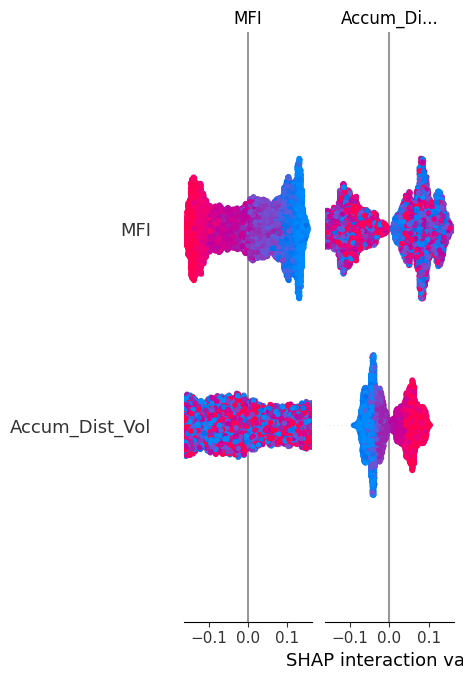


=== Generating SHAP Summary Plot for Xgboost ===


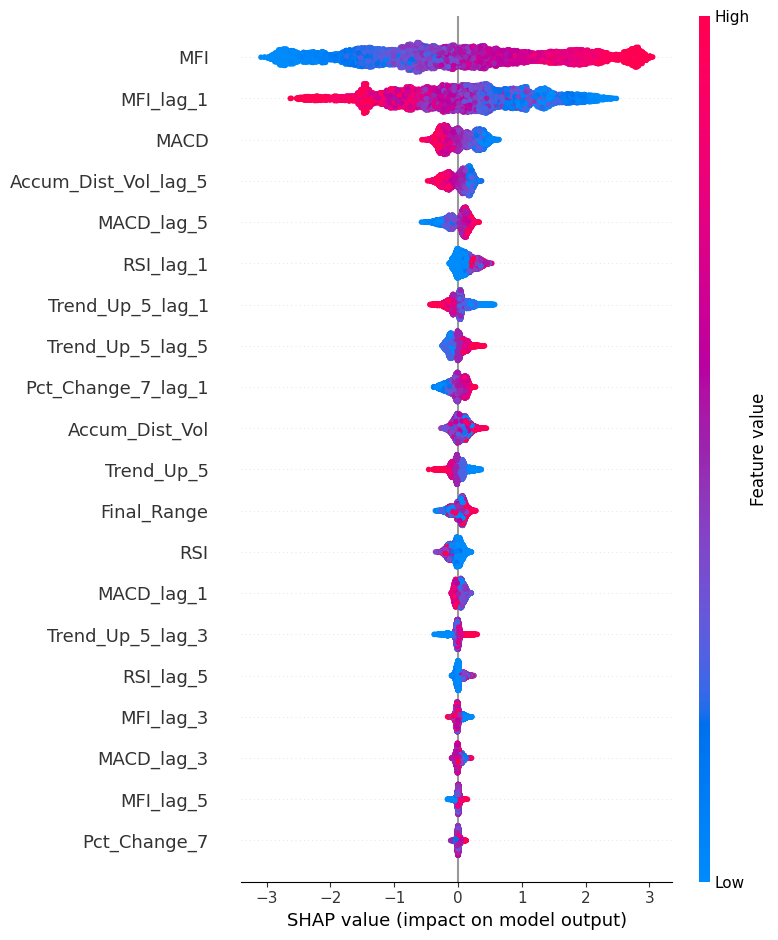


=== Generating SHAP Summary Plot for Catboost ===


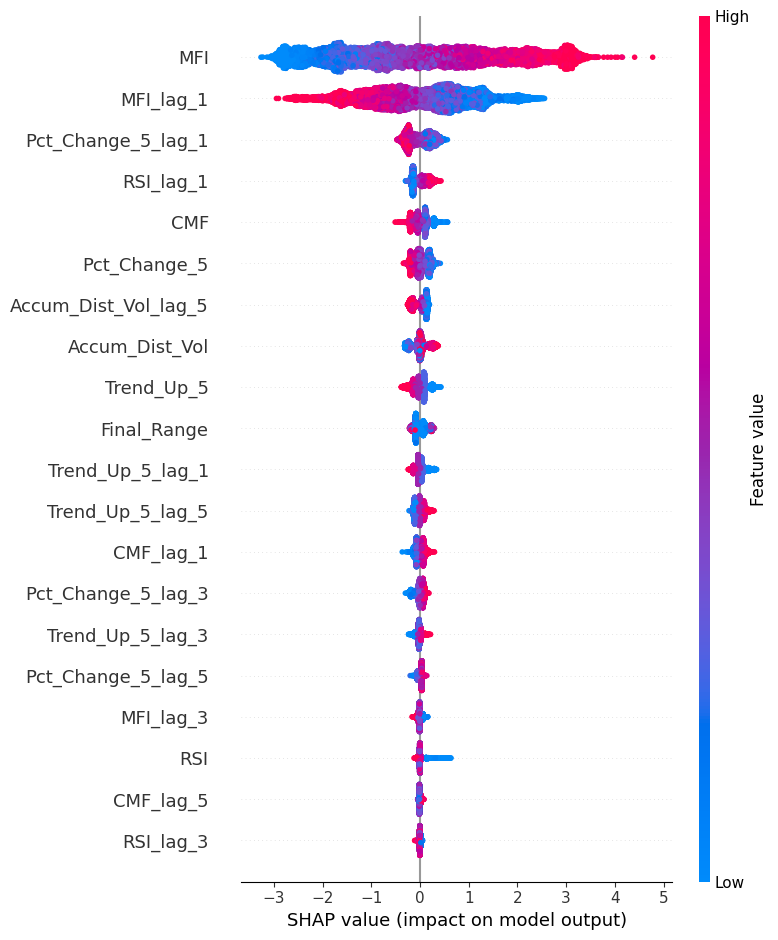

In [ ]:
# Assume models, data, and variables come from running the existing TDA code
models = {
    'randomforest': joblib.load(f'Joblib_Files/randomforest_model_{volume_threshold}_{start_backtest}.joblib'),
    'xgboost': joblib.load(f'Joblib_Files/xgboost_model_{volume_threshold}_{start_backtest}.joblib'),
    'catboost': joblib.load(f'Joblib_Files/catboost_model_{volume_threshold}_{start_backtest}.joblib')
}

# Load feature names for each model (including TDA and lagged features)
model_features = {}
for model_name in ['randomforest', 'xgboost', 'catboost']:
    model_features[model_name] = joblib.load(f'Joblib_Files/model_features_{model_name}_{volume_threshold}_{start_backtest}.joblib')

# Prepare X_test using df_transformed_test which includes lagged and TDA features
for model_name in models.keys():
    print(f"\n=== Generating SHAP Summary Plot for {model_name.capitalize()} ===")
    
    # Use df_transformed_test produced by preprocess_data in the TDA code
    df_transformed_test = df_test[selected_features + [f'Persistence_Entropy_{model_name}', f'Betti_Number_{model_name}', 
                                                      f'Mean_Lifetime_{model_name}', f'Persistent_Holes_{model_name}']].copy()
    df_transformed_test, _ = preprocess_data(df_transformed_test, selected_features, model_name)  # Apply lags and processing
    X_test = df_transformed_test.values
    
    # Check feature count consistency
    expected_features = len(model_features[model_name])
    actual_features = X_test.shape[1]
    if expected_features != actual_features:
        raise ValueError(f"Number of features mismatch for {model_name}: expected {expected_features}, got {actual_features}. "
                         f"Check if all features in {model_features[model_name]} are present.")
    
    # Create SHAP explainer object suitable for the model
    explainer = shap.TreeExplainer(models[model_name])  # Using X_test directly
    
    # Calculate SHAP values for the test data
    try:
        shap_values = explainer.shap_values(X_test)
    except Exception as e:
        print(f"Error computing SHAP values for {model_name}: {e}")
        continue
    
    # Handle SHAP output for binary classification models
    if isinstance(shap_values, list) and len(shap_values) == 2:
        shap_values = shap_values[1]  # Use positive class values for binary problems
    
    # Plot summary_plot to show feature importance and impact
    shap.summary_plot(shap_values, X_test, feature_names=model_features[model_name])


### ⚙️ Machine Learning Models with Non-Topological and SHAP-Enhanced TDA-Based Features

This section trains and tunes **Random Forest**, **XGBoost**, and **CatBoost** models using a combination of *non-topological* and **Topological Data Analysis (TDA)** features, with enhanced data alignment, robust handling of missing values, and SHAP-based interpretability.

The workflow includes:
1. **Data Alignment and Validation**: Aligning training and test data indices with target labels and verifying sample size consistency to ensure data integrity.
2. **Feature Selection**: Identifying the top 7 features based on **SHAP values** for model-specific importance, providing interpretable insights into feature contributions, with missing values handled using forward and backward filling to preserve temporal continuity.
3. **TDA Preprocessing**: Applying logarithmic transformation for skewed features, clipping outliers to ±3 standard deviations, and normalizing data using `StandardScaler` for TDA feature extraction, with missing values filled using forward and backward methods.
4. **TDA Feature Extraction**: Computing TDA features (Persistence Entropy, Betti Number, Mean Lifetime, Persistent Holes) using a sliding window approach with `ripser` for efficient persistence diagrams, with window size and maximum edge length tuned via **Time Series Cross-Validation (TSCV)**.
5. **Data Preprocessing**: Applying robust scaling with `RobustScaler`, winsorizing data at 5% limits using `mstats` to handle outliers, and adding lagged features (lags of 1, 3, and 5) for non-topological features, with missing values filled using forward and backward methods.
6. **Model Tuning and Training**: Performing hyperparameter tuning using **TSCV** and `RandomizedSearchCV` with ROC-AUC scoring, followed by retraining on the full dataset with **SMOTE** for class balancing to address class imbalance, incorporating explicit label encoder handling for XGBoost.
7. **Evaluation**: Assessing models on the test set using **ROC-AUC**, classification metrics (accuracy, confusion matrix, classification report), and **F1-score** with a **95% confidence interval** estimated via **bootstrap resampling**. An optimal classification threshold is determined by maximizing the difference between true positive rate and false positive rate.

Results, including model performance metrics, TDA tuning outcomes, and processed datasets, are saved as Excel and Joblib files for further analysis and reproducibility.


=== Processing Randomforest ===


100%|===================| 50565/50572 [1328:18<00:11]         

[DEBUG] SHAP values shape: (25286, 40, 2)
Important features for randomforest (based on SHAP): ['MFI', 'Accum_Dist_Vol', 'Final_Range', 'RSI', 'Pct_Change_1', 'Z_Score_10', 'Pct_Change_5']
Testing window_size=20, max_edge_length=0.5 for randomforest
Window size 20, max_edge_length 0.5: Mean AUC=0.757
Testing window_size=20, max_edge_length=1.0 for randomforest
Window size 20, max_edge_length 1.0: Mean AUC=0.757
Testing window_size=20, max_edge_length=1.5 for randomforest
Window size 20, max_edge_length 1.5: Mean AUC=0.755
Testing window_size=20, max_edge_length=2.0 for randomforest
Window size 20, max_edge_length 2.0: Mean AUC=0.754
Testing window_size=30, max_edge_length=0.5 for randomforest
Window size 30, max_edge_length 0.5: Mean AUC=0.757
Testing window_size=30, max_edge_length=1.0 for randomforest
Window size 30, max_edge_length 1.0: Mean AUC=0.756
Testing window_size=30, max_edge_length=1.5 for randomforest
Window size 30, max_edge_length 1.5: Mean AUC=0.755
Testing window_size=

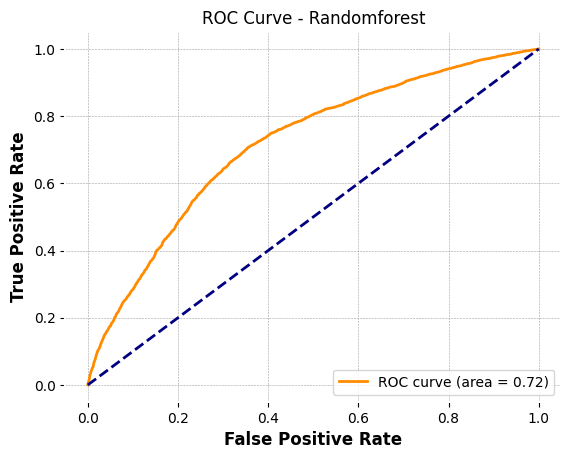


=== Processing Xgboost ===


100%|===================| 25213/25286 [01:37<00:00]        

[DEBUG] SHAP values shape: (25286, 44)
Important features for xgboost (based on SHAP): ['MFI', 'Accum_Dist_Vol', 'Pct_Change_5', 'RSI', 'Trend_Up_5', 'CMF', 'Final_Range']
Testing window_size=20, max_edge_length=0.5 for xgboost
Window size 20, max_edge_length 0.5: Mean AUC=0.752
Testing window_size=20, max_edge_length=1.0 for xgboost
Window size 20, max_edge_length 1.0: Mean AUC=0.754
Testing window_size=20, max_edge_length=1.5 for xgboost
Window size 20, max_edge_length 1.5: Mean AUC=0.751
Testing window_size=20, max_edge_length=2.0 for xgboost
Window size 20, max_edge_length 2.0: Mean AUC=0.753
Testing window_size=30, max_edge_length=0.5 for xgboost
Window size 30, max_edge_length 0.5: Mean AUC=0.752
Testing window_size=30, max_edge_length=1.0 for xgboost
Window size 30, max_edge_length 1.0: Mean AUC=0.756
Testing window_size=30, max_edge_length=1.5 for xgboost
Window size 30, max_edge_length 1.5: Mean AUC=0.753
Testing window_size=30, max_edge_length=2.0 for xgboost
Window size 30, 

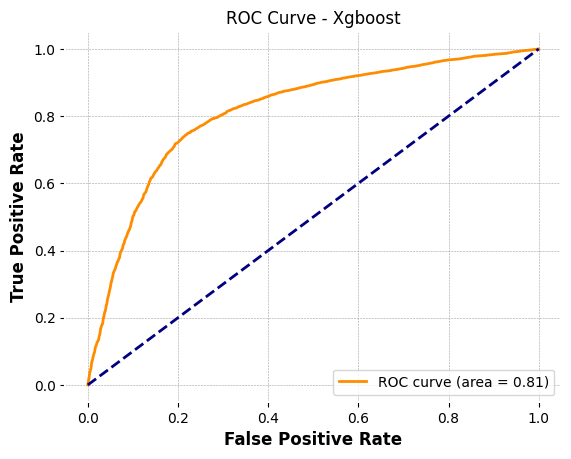


=== Processing Catboost ===


100%|===================| 25284/25286 [17:58<00:00]        

[DEBUG] SHAP values shape: (25286, 48)
Important features for catboost (based on SHAP): ['MFI', 'Accum_Dist_Vol', 'RSI', 'Trend_Up_5', 'Pct_Change_5', 'CMF', 'Final_Range']
Testing window_size=20, max_edge_length=0.5 for catboost
Window size 20, max_edge_length 0.5: Mean AUC=0.778
Testing window_size=20, max_edge_length=1.0 for catboost
Window size 20, max_edge_length 1.0: Mean AUC=0.778
Testing window_size=20, max_edge_length=1.5 for catboost
Window size 20, max_edge_length 1.5: Mean AUC=0.777
Testing window_size=20, max_edge_length=2.0 for catboost
Window size 20, max_edge_length 2.0: Mean AUC=0.776
Testing window_size=30, max_edge_length=0.5 for catboost
Window size 30, max_edge_length 0.5: Mean AUC=0.778
Testing window_size=30, max_edge_length=1.0 for catboost
Window size 30, max_edge_length 1.0: Mean AUC=0.779
Testing window_size=30, max_edge_length=1.5 for catboost
Window size 30, max_edge_length 1.5: Mean AUC=0.776
Testing window_size=30, max_edge_length=2.0 for catboost
Window 

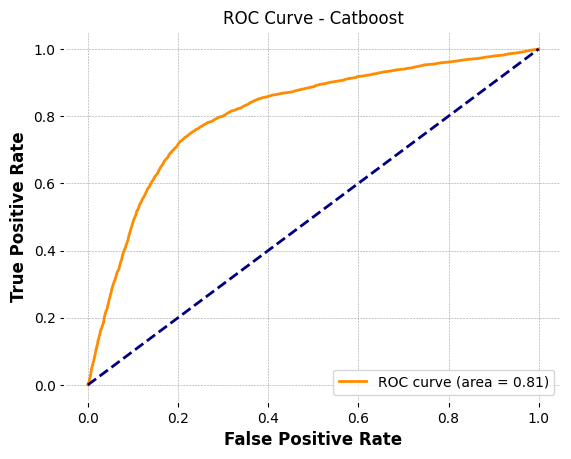


=== Summary of F1-Score Confidence Intervals for All Models ===
+----+--------------+-----------------+------------------+------------------+------------+---------------+
|    | Model        |   Test F1-Score |   CI Lower (95%) |   CI Upper (95%) |   Test AUC |   Sample Size |
|----+--------------+-----------------+------------------+------------------+------------+---------------|
|  0 | Randomforest |          0.6664 |           0.6558 |           0.6767 |     0.7169 |         10828 |
|  1 | Xgboost      |          0.7459 |           0.7364 |           0.7550 |     0.8143 |         10828 |
|  2 | Catboost     |          0.7444 |           0.7355 |           0.7539 |     0.8085 |         10828 |
+----+--------------+-----------------+------------------+------------------+------------+---------------+

Summary saved to Excel_Files/f1_confidence_intervals_summary_example_threshold_example_date.xlsx

Processing and prediction for all models completed successfully!


In [ ]:
def select_important_features(df, target, model_type, top_n=7):
    """
    Select top N features based on SHAP values for the specified model
    """
    X = df.select_dtypes(include=[np.number]).ffill().bfill()
    y = target
    if model_type == 'randomforest':
        model = RandomForestClassifier(n_estimators=100, random_state=1)
    elif model_type == 'xgboost':
        model = XGBClassifier(objective='binary:logistic', random_state=1, use_label_encoder=False)
    elif model_type == 'catboost':
        model = CatBoostClassifier(verbose=0, random_state=1)
    else:
        raise ValueError(f"Unsupported model type: {model_type}")

    model.fit(X, y)
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    values = shap_values.values
    print(f"[DEBUG] SHAP values shape: {values.shape}")  # Debug statement
    if values.ndim == 3:
        # Select SHAP values for positive class (class 1)
        values = values[:, :, 1]
    elif values.ndim == 2:
        # For models returning a single output
        pass
    else:
        raise ValueError(f"Unexpected SHAP values shape: {values.shape}")
    shap_importances = np.abs(values).mean(axis=0)
    importances = pd.Series(shap_importances, index=X.columns)
    important_features = importances.nlargest(top_n).index.tolist()
    return important_features, importances

def preprocess_for_tda(df, features):
    """
    Preprocess features for TDA: logarithm, normalization, and outlier handling
    """
    df_tda = df[features].copy()
    df_tda = df_tda.ffill().bfill()
   
    for col in df_tda.columns:
        if skew(df_tda[col].dropna()) > 1.0 and (df_tda[col] > 0).all():
            df_tda[col] = np.log1p(df_tda[col])
   
    for col in df_tda.columns:
        df_tda[col] = np.clip(
            df_tda[col],
            df_tda[col].mean() - 3 * df_tda[col].std(),
            df_tda[col].mean() + 3 * df_tda[col].std()
        )
   
    scaler = StandardScaler()
    df_tda = pd.DataFrame(scaler.fit_transform(df_tda), columns=df_tda.columns, index=df_tda.index)
    return df_tda, scaler

def extract_tda_features(df, window_size=50, max_edge_length=2.0):
    """
    Extract TDA features using a sliding window with ripser
    """
    tda_entropy = []
    tda_betti = []
    tda_mean_lifetime = []
    tda_persistent_holes = []
   
    for i in range(window_size, len(df)):
        window_data = df.iloc[i - window_size:i].values
        diagrams = ripser(window_data, maxdim=1, thresh=max_edge_length)['dgms']
        h1 = diagrams[1] # Homology group H1
       
        lifetimes = h1[:, 1] - h1[:, 0]
        finite_lifetimes = lifetimes[np.isfinite(lifetimes)]
       
        if len(finite_lifetimes) > 0:
            p = finite_lifetimes / np.sum(finite_lifetimes)
            entropy = -np.sum(p * np.log(p + 1e-10))
            mean_lifetime = np.mean(finite_lifetimes)
        else:
            entropy = 0
            mean_lifetime = 0
       
        betti = len(finite_lifetimes)
        persistent_holes = np.sum(finite_lifetimes > 0.5)
       
        tda_entropy.append(entropy)
        tda_betti.append(betti)
        tda_mean_lifetime.append(mean_lifetime)
        tda_persistent_holes.append(persistent_holes)
   
    pad = [np.nan] * window_size
    return (
        pad + tda_entropy,
        pad + tda_betti,
        pad + tda_mean_lifetime,
        pad + tda_persistent_holes
    )

def tune_tda_params(df, target, features, model_type, window_sizes=[20, 30, 50, 75], max_edge_lengths=[0.5, 1.0, 1.5, 2.0], n_splits=5):
    """
    Tune window size and max_edge_length for the specified model
    """
    tscv = TimeSeriesSplit(n_splits=n_splits)
    results = []
   
    df_tda, _ = preprocess_for_tda(df, features)
   
    for window_size in window_sizes:
        for max_edge_length in max_edge_lengths:
            print(f"Testing window_size={window_size}, max_edge_length={max_edge_length} for {model_type}")
            entropy, betti, mean_lifetime, persistent_holes = extract_tda_features(df_tda, window_size, max_edge_length)
           
            df_temp = df.copy()
            df_temp[f'Persistence_Entropy_{model_type}'] = entropy
            df_temp[f'Betti_Number_{model_type}'] = betti
            df_temp[f'Mean_Lifetime_{model_type}'] = mean_lifetime
            df_temp[f'Persistent_Holes_{model_type}'] = persistent_holes
            df_temp = df_temp.ffill().bfill()
           
            auc_scores = []
            for train_idx, val_idx in tscv.split(df_temp):
                X_train = df_temp.iloc[train_idx][features + [f'Persistence_Entropy_{model_type}', f'Betti_Number_{model_type}',
                                                             f'Mean_Lifetime_{model_type}', f'Persistent_Holes_{model_type}']]
                y_train = target.iloc[train_idx]
                X_val = df_temp.iloc[val_idx][features + [f'Persistence_Entropy_{model_type}', f'Betti_Number_{model_type}',
                                                         f'Mean_Lifetime_{model_type}', f'Persistent_Holes_{model_type}']]
                y_val = target.iloc[val_idx]
               
                if model_type == 'randomforest':
                    model = RandomForestClassifier(n_estimators=100, random_state=1)
                elif model_type == 'xgboost':
                    model = XGBClassifier(objective='binary:logistic', random_state=1, use_label_encoder=False)
                elif model_type == 'catboost':
                    model = CatBoostClassifier(verbose=0, random_state=1)
               
                model.fit(X_train, y_train)
                y_proba = model.predict_proba(X_val)[:, 1]
                auc_scores.append(roc_auc_score(y_val, y_proba))
           
            mean_auc = np.mean(auc_scores)
            results.append({'window_size': window_size, 'max_edge_length': max_edge_length, 'mean_auc': mean_auc})
            print(f"Window size {window_size}, max_edge_length {max_edge_length}: Mean AUC={mean_auc:.3f}")
   
    best_result = max(results, key=lambda x: x['mean_auc'])
    print(f"\nBest parameters for {model_type}: {best_result}")
    return best_result, pd.DataFrame(results)

def preprocess_data(df, selected_features, model_type, lags=[1, 3, 5]):
    """
    Preprocess data with robust scaling, winsorization, and lagged features
    """
    features = selected_features + [f'Persistence_Entropy_{model_type}', f'Betti_Number_{model_type}',
                                   f'Mean_Lifetime_{model_type}', f'Persistent_Holes_{model_type}']
    missing_cols = [col for col in features if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Columns {missing_cols} not found in DataFrame")
    df_selected = df[features].copy()
   
    for col in df_selected.columns:
        df_selected[col] = mstats.winsorize(df_selected[col], limits=[0.05, 0.05])
   
    scaler = RobustScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns, index=df_selected.index)
   
    for lag in lags:
        for col in selected_features:
            df_scaled[f'{col}_lag_{lag}'] = df_scaled[col].shift(lag)
   
    df_scaled = df_scaled.ffill().bfill()
    return df_scaled, scaler

def tune_model_with_cv(X, y, model_type, n_splits=5):
    """
    Tune model using RandomizedSearchCV with time-series cross-validation
    """
    tscv = TimeSeriesSplit(n_splits=n_splits)
   
    if model_type == 'randomforest':
        model = RandomForestClassifier(random_state=1, class_weight='balanced')
        param_grid = {
            'n_estimators': [100, 150, 200],
            'max_depth': [3, 5, 7],
            'min_samples_split': [20, 30, 40],
            'min_samples_leaf': [10, 20]
        }
    elif model_type == 'xgboost':
        model = XGBClassifier(objective='binary:logistic', random_state=1, use_label_encoder=False)
        param_grid = {
            'n_estimators': [25, 50, 100],
            'learning_rate': [0.01, 0.1],
            'min_child_weight': [3, 5, 7],
            'max_depth': [3, 5],
            'gamma': [0.1, 0.3],
            'subsample': [0.7, 0.8],
            'colsample_bytree': [0.7, 0.8]
        }
    elif model_type == 'catboost':
        model = CatBoostClassifier(verbose=0, random_state=1, auto_class_weights='Balanced')
        param_grid = {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1],
            'depth': [3, 5],
            'l2_leaf_reg': [3, 5],
            'bagging_temperature': [0.5, 1.0]
        }
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
    search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=tscv, scoring='roc_auc', n_jobs=-1, random_state=1)
    search.fit(X, y)
    print(f"Best parameters for {model_type}: {search.best_params_}")
    print(f"Best CV AUC: {search.best_score_:.4f}")
    if model_type == 'xgboost':
        best_model = XGBClassifier(**search.best_params_, objective='binary:logistic', random_state=1, use_label_encoder=False)
    else:
        best_model = search.best_estimator_
    return best_model

def train_final_model(model, X_train_val, y_train_val):
    """
    Train final model with Early Stopping for XGBoost and CatBoost
    """
    if isinstance(model, XGBClassifier):
        model.set_params(
            eval_metric='logloss',
            early_stopping_rounds=10,
            use_label_encoder=False
        )
        model.fit(
            X_train_val,
            y_train_val,
            eval_set=[(X_train_val, y_train_val)],
            verbose=False
        )
    elif isinstance(model, CatBoostClassifier):
        model.fit(
            X_train_val,
            y_train_val,
            early_stopping_rounds=10,
            eval_set=(X_train_val, y_train_val),
            verbose=False
        )
    else:
        model.fit(X_train_val, y_train_val)
    return model

def bootstrap_confidence_interval(y_true, y_pred, metric_func, n_iterations=1000, confidence_level=0.95):
    """
    Calculate confidence interval using bootstrap method
    """
    if len(y_true) == 0 or len(y_pred) == 0:
        raise ValueError("Input arrays cannot be empty")
   
    n = len(y_true)
    metric_values = []
   
    for _ in range(n_iterations):
        indices = np.random.choice(n, size=n, replace=True)
        y_true_sample = y_true[indices]
        y_pred_sample = y_pred[indices]
        try:
            metric_value = metric_func(y_true_sample, y_pred_sample)
            metric_values.append(metric_value)
        except ValueError:
            continue
   
    if not metric_values:
        raise ValueError("No valid metric values computed during bootstrap")
   
    metric_value = metric_func(y_true, y_pred)
    lower_bound = np.percentile(metric_values, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(metric_values, (1 + confidence_level) / 2 * 100)
   
    return metric_value, lower_bound, upper_bound

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, volume_threshold, start_backtest):
    """
    Evaluate model, calculate F1-Score with confidence interval, and plot ROC curve
    """
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    y_train_pred = (y_train_prob >= optimal_threshold).astype(int)
    y_test_pred = (y_test_prob >= optimal_threshold).astype(int)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1, ci_lower, ci_upper = bootstrap_confidence_interval(y_test, y_test_pred, f1_score)
    results = [{
        'Model': model_name.capitalize(),
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Test F1-Score': test_f1,
        'CI Lower (95%)': ci_lower,
        'CI Upper (95%)': ci_upper,
        'Test AUC': roc_auc,
        'Sample Size': len(y_test)
    }]
    results_df = pd.DataFrame(results)
    print(f"\n=== Evaluation Results for {model_name.capitalize()} ===")
    print(tabulate(results_df, headers='keys', tablefmt='psql', floatfmt='.4f'))
    print(f"Optimal threshold: {optimal_threshold:.4f}")
    print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))
    output_file = f'Excel_Files/{model_name}_results_{volume_threshold}_{start_backtest}.xlsx'
    results_df.to_excel(output_file, index=False)
    print(f"Results saved to {output_file}")
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name.capitalize()}')
    plt.legend(loc="lower right")
    plt.show()
    return optimal_threshold, y_test_pred, test_f1, ci_lower, ci_upper, roc_auc

# Main execution
os.makedirs('Joblib_Files', exist_ok=True)
os.makedirs('Excel_Files', exist_ok=True)

# Align data
df_train_val = df_train_val.loc[df_train_val.index.intersection(df_train_val['Target'].index)]
y_train_val = df_train_val['Target']
df_test = df_test.loc[df_test.index.intersection(df_test['Target'].index)]
y_test = df_test['Target']

# Verify sample sizes
if len(df_train_val) != len(y_train_val):
    raise ValueError(f"Mismatch in sample sizes: df_train_val has {len(df_train_val)} samples, y_train_val has {len(y_train_val)} samples")
if len(df_test) != len(y_test):
    raise ValueError(f"Mismatch in test sample sizes: df_test has {len(df_test)} samples, y_test has {len(y_test)} samples")

models = ['randomforest', 'xgboost', 'catboost']
model_features = {}
model_params = {}
tuning_results = {}
all_results = []
volume_threshold = 'example_threshold'
start_backtest = 'example_date'

for model_name in models:
    print(f"\n=== Processing {model_name.capitalize()} ===")
   
    # Select important features using SHAP
    selected_features, importances = select_important_features(
        df_train_val.drop(columns=['Target']), df_train_val['Target'], model_name, top_n=7
    )
    print(f"Important features for {model_name} (based on SHAP): {selected_features}")
    model_features[model_name] = selected_features
   
    # Tune TDA parameters
    best_params, window_results = tune_tda_params(
        df_train_val, df_train_val['Target'], selected_features, model_name
    )
    model_params[model_name] = best_params
    tuning_results[model_name] = window_results
   
    # Preprocess data for TDA
    df_tda_train, scaler_tda = preprocess_for_tda(df_train_val, selected_features)
    df_tda_test, _ = preprocess_for_tda(df_test, selected_features)
   
    # Extract TDA features
    entropy_train, betti_train, mean_lifetime_train, persistent_holes_train = extract_tda_features(
        df_tda_train, best_params['window_size'], best_params['max_edge_length']
    )
    entropy_test, betti_test, mean_lifetime_test, persistent_holes_test = extract_tda_features(
        df_tda_test, best_params['window_size'], best_params['max_edge_length']
    )
   
    # Add TDA features to DataFrames
    df_train_val[f'Persistence_Entropy_{model_name}'] = entropy_train
    df_train_val[f'Betti_Number_{model_name}'] = betti_train
    df_train_val[f'Mean_Lifetime_{model_name}'] = mean_lifetime_train
    df_train_val[f'Persistent_Holes_{model_name}'] = persistent_holes_train
    df_test[f'Persistence_Entropy_{model_name}'] = entropy_test
    df_test[f'Betti_Number_{model_name}'] = betti_test
    df_test[f'Mean_Lifetime_{model_name}'] = mean_lifetime_test
    df_test[f'Persistent_Holes_{model_name}'] = persistent_holes_test
   
    # Fill NaN values for TDA features
    df_train_val[[f'Persistence_Entropy_{model_name}', f'Betti_Number_{model_name}',
                  f'Mean_Lifetime_{model_name}', f'Persistent_Holes_{model_name}']] = \
        df_train_val[[f'Persistence_Entropy_{model_name}', f'Betti_Number_{model_name}',
                      f'Mean_Lifetime_{model_name}', f'Persistent_Holes_{model_name}']].ffill().bfill()
    df_test[[f'Persistence_Entropy_{model_name}', f'Betti_Number_{model_name}',
             f'Mean_Lifetime_{model_name}', f'Persistent_Holes_{model_name}']] = \
        df_test[[f'Persistence_Entropy_{model_name}', f'Betti_Number_{model_name}',
                 f'Mean_Lifetime_{model_name}', f'Persistent_Holes_{model_name}']].ffill().bfill()
   
    # Preprocess data for training
    df_transformed, scaler = preprocess_data(df_train_val, selected_features, model_name)
    X_train_val = df_transformed.values
    y_train_val = df_train_val['Target'].values
   
    df_features_test = df_test[selected_features + [f'Persistence_Entropy_{model_name}', f'Betti_Number_{model_name}',
                                                  f'Mean_Lifetime_{model_name}', f'Persistent_Holes_{model_name}']]
    df_transformed_test, _ = preprocess_data(df_features_test, selected_features, model_name)
    X_test = df_transformed_test.values
    y_test = df_test['Target'].loc[df_transformed_test.index].values
   
    # Verify test data sample sizes
    if len(X_test) != len(y_test):
        raise ValueError(f"Mismatch in test sample sizes: X_test has {len(X_test)} samples, y_test has {len(y_test)} samples")
   
    # Save features
    joblib.dump(df_transformed.columns.tolist(), f'Joblib_Files/model_features_{model_name}_{volume_threshold}_{start_backtest}.joblib')
   
    # Apply SMOTE for class balancing
    smote = SMOTE(random_state=1)
    X_train_val, y_train_val = smote.fit_resample(X_train_val, y_train_val)
   
    # Tune and train model
    best_model = tune_model_with_cv(X_train_val, y_train_val, model_type=model_name, n_splits=5)
    model = train_final_model(best_model, X_train_val, y_train_val)
   
    # Save model
    joblib.dump(model, f'Joblib_Files/{model_name}_model_{volume_threshold}_{start_backtest}.joblib')
   
    # Evaluate model
    optimal_threshold, y_test_pred, test_f1, ci_lower, ci_upper, roc_auc = evaluate_model(
        model, X_train_val, X_test, y_train_val, y_test, model_name, volume_threshold, start_backtest
    )
   
    # Save results
    joblib.dump({
        'model': model,
        'y_test': y_test,
        'y_pred': y_test_pred
    }, f'Joblib_Files/{model_name}_full_result_{volume_threshold}_{start_backtest}.joblib')
    # Collect results for summary table
    all_results.append({
        'Model': model_name.capitalize(),
        'Test F1-Score': test_f1,
        'CI Lower (95%)': ci_lower,
        'CI Upper (95%)': ci_upper,
        'Test AUC': roc_auc,
        'Sample Size': len(y_test)
    })

# Save DataFrames and tuning results
df_train_val.to_excel(f'Excel_Files/df_train_val_with_tda_{volume_threshold}_{start_backtest}.xlsx')
df_test.to_excel(f'Excel_Files/df_test_with_tda_{volume_threshold}_{start_backtest}.xlsx')
for model_name, results in tuning_results.items():
    results.to_excel(f'Excel_Files/window_tuning_results_{model_name}_{volume_threshold}_{start_backtest}.xlsx')

# Print summary table for all models
all_results_df = pd.DataFrame(all_results)
print("\n=== Summary of F1-Score Confidence Intervals for All Models ===")
print(tabulate(all_results_df, headers='keys', tablefmt='psql', floatfmt='.4f'))
# Save summary to Excel
summary_file = f'Excel_Files/f1_confidence_intervals_summary_{volume_threshold}_{start_backtest}.xlsx'
all_results_df.to_excel(summary_file, index=False)
print(f"\nSummary saved to {summary_file}")
print("\nProcessing and prediction for all models completed successfully!")